- Module Code: CSMAD21 
- Assignment Report Title: CSMAD21 - 2023 Summative Coursework
- Date (when work was completed): 07/12/23
- Actual hours spent on assignment: 47.5 hours

# CSMAD21 - 2023 Summative Coursework 

## 1. LA Metro Bike Share (Exploratory Data Analysis)

In [1]:
# importing libraries for Tasks 1 & 2
import pandas as pd # imported to load and manipulate data
import matplotlib.pyplot as plt # imported for data visualisation 
import numpy as np # imported for additional maths and stats functions
import seaborn as sns #imported for additional data visualisation
%matplotlib inline # inline magic command added to display plots 
import warnings 
warnings.filterwarnings('ignore') #suppresses warnings in the notebook. 
# warnings.resetwarnings() #commented line can be run to re-enable warnings.
#%pdb #enable or disable automatic activation of the debugger when exceptions occur.

UsageError: unrecognized arguments: # inline magic command added to display plots


### 1.1 Understanding the Data 

The dataset used for the analysis is sourced from the LA Metro Bike Share website, a repository known for its comprehensive information on bicycle trips with the LA Metro Bike Share service. (Source: https://bikeshare.metro.net/about/data/) The choice of the source for this dataset source contributes to the robustness of the findings derived in the analysis.

The dataset contains anonymised data that captures various bicycle journeys with the service. The specific data file used for this exercise, 'metro.csv', adheres to the widely recognized comma-separated-values (CSV) format, ensuring  compatibility and ease of integration into our analytical framework. 

The use of data from a trusted source, formatted in a standardised manner, enhances the credibility of the analytical outcomes, affirming the quality of the insights generated. 

In [2]:
# Directory created for Jupyter Notebook.
# Notebook runs from same space all other paths are relative to 
# datafile "metro.csv" addressed from the same space.

metrodata = pd.read_csv('./data_assignment/metro.csv',low_memory=False) #set variable name for datafile 
metrodata.head() #returns first 'n' rows in datafile metrodata, default is n = '5'


FileNotFoundError: [Errno 2] No such file or directory: './data_assignment/metro.csv'

The dataset comprises 15 distinctive columns, with each row representing an individual bicycle journey. Unique trip IDs are assigned to each trip, ensuring traceability for every record. As demonstrated in the previous section, using the '.head()' feature, we display the initial five rows to provide a snapshot of the dataset's contents.

Each column is accompanied by header information that succinctly outlines the nature of its data. This concise guide serves as a key reference during our analyses, enhancing the dataset's usability for effective interpretation. Understanding the organisational structure of the dataset lays a foundation for clarity and interpretability, forming a crucial building block for our subsequent analyses.

### 1.2 Data Preprocessing & Error Analysis 

In the early stages of our analysis, we conduct a comprehensive review of the dataset to identify any occurrences of missing or erroneous values. 

This careful examination is carried out with the primary goal of maintaining the integrity and reliability of the dataset. Our focus is specifically on investigating the characteristics and patterns associated with features that may exhibit missing values.

Through a meticulous assessment of the dataset's completeness, our aim was to identify potential gaps or inaccuracies that could compromise the robustness of subsequent analytical processes. This proactive approach to ensuring data quality serves as a crucial foundation for generating meaningful and accurate insights. 


In [3]:
metrodata.isna().sum #checking for missing values in the metrodata file

<bound method NDFrame._add_numeric_operations.<locals>.sum of        trip_id  duration  start_time  end_time  start_station  start_lat  \
0        False     False       False     False          False      False   
1        False     False       False     False          False      False   
2        False     False       False     False          False      False   
3        False     False       False     False          False      False   
4        False     False       False     False          False      False   
...        ...       ...         ...       ...            ...        ...   
92119    False     False       False     False          False      False   
92120    False     False       False     False          False      False   
92121    False     False       False     False          False      False   
92122    False     False       False     False          False      False   
92123    False     False       False     False          False      False   

       start_lon  end_sta

After identifying the missing or erroneous values in our dataset, we systematically conduct a data cleansing process, carefully removing rows containing these identified issues. 

The application of this data cleansing technique aims to minimise potential disruptions in subsequent analyses and interpretations. The removal of rows with missing values is executed thoughtfully to uphold the overall integrity of the dataset, aligning with established best practices in data preprocessing. 

This thorough cleansing process plays a vital role in creating a refined and reliable dataset, establishing a solid foundation for accurate and meaningful insights as we progress through the subsequent stages of our analysis.

In [4]:
#overview of the metrodata file before and after removing the missing values 

print("Before removing the rows with missing / 'NaN' values:\n", metrodata) 

metrodata2 = metrodata.dropna() #dataset after removing any rows with Nan values or no data

print("After removing the rows with missing / 'NaN' values:\n", metrodata2)

Before removing the rows with missing / 'NaN' values:
          trip_id  duration       start_time         end_time  start_station  \
0      124657107         5    7/1/2019 0:04    7/1/2019 0:09           4312   
1      124657587         9    7/1/2019 0:07    7/1/2019 0:16           3066   
2      124658068         5    7/1/2019 0:20    7/1/2019 0:25           4410   
3      124659747        20    7/1/2019 0:44    7/1/2019 1:04           3045   
4      124660227        27    7/1/2019 0:44    7/1/2019 1:11           3035   
...          ...       ...              ...              ...            ...   
92119  130053092         8  9/30/2019 23:32  9/30/2019 23:40           3038   
92120  130053090        15  9/30/2019 23:38  9/30/2019 23:53           4401   
92121  130053089         1  9/30/2019 23:40  9/30/2019 23:41           3038   
92122  130053088        22  9/30/2019 23:41   10/1/2019 0:03           3067   
92123  130053087         4  9/30/2019 23:58   10/1/2019 0:02           4417 

In [5]:
metrodata2.shape # displays (rows,columns)

(86760, 15)

As shown in the previous sections, our initial dataset contains 92,124 rows. After we clean the data by removing any rows with missing values, we find that our dataset now contains 86,760 rows. 

This reduction in the number of rows demonstrates the effective removal of incomplete or unreliable data, leading to a more dependable dataset for our upcoming analyses. The careful elimination of rows with missing data ensures that our analytical efforts are grounded in trustworthy and complete information. 

### 1.3 Data Characteristics 

#### 1.3.1 Statistical Analysis 

By examining simple statistics such as averages and ranges, we can gain an initial understanding of our dataset. This information lays the foundation for identifying overall trends and characteristics, guiding us toward more informed decisions and insights or prompting further analysis.

This statistical exploration serves as a bridge between cleaning up the data and delving into more detailed analyses.  We can calculate the mean trip duration using the pandas library, which we imported earlier. The results are presented with a precision of 2 and 3 decimal places.

In [6]:
metrodata2['duration'] #overview of the duration column 

0         5
1         9
2         5
3        20
4        27
         ..
92118    14
92119     8
92120    15
92121     1
92122    22
Name: duration, Length: 86760, dtype: int64

In [7]:
print("Mean Trip duration to 2 decimal places:",round(metrodata2.duration.mean(),2)) #print mean duration and round off to 2 dp
print("Mean Trip duration to 3 decimal places:",round(metrodata2.duration.mean(),3)) #print mean duration and round off to 3 dp

Mean Trip duration to 2 decimal places: 27.0
Mean Trip duration to 3 decimal places: 26.996


We also look into other statistical features for the duration column, this time using the NumPy library.

In [8]:
print("Standard deviation for the Trip duration:",round(np.std(metrodata2['duration']),2)) #standard deviation calculation using numpy library 
print("Mean Trip duration (using NumPy):",round(np.mean(metrodata2['duration']),3)) #mean calculation using numpy library 
print("Median Trip duration:",np.median(metrodata2['duration'])) #median calculation using numpy library 
print("Maximum Trip duration:",np.max(metrodata2['duration'])) #maximum trip duration 
print("Minimum Trip duration:",np.min(metrodata2['duration'])) #minimum trip duration 
print("Range for Trip durations:",np.max(metrodata2['duration']) - np.min(metrodata2['duration']))

Standard deviation for the Trip duration: 95.72
Mean Trip duration (using NumPy): 26.996
Median Trip duration: 11.0
Maximum Trip duration: 1440
Minimum Trip duration: 1
Range for Trip durations: 1439


In the previous section, we calculated the range of the distribution. Now, using the method below, we also calculate the quantiles for the duration column to gain further insight into the spread of the distribution. 

In [9]:
#calculating quantiles for the duration

metrodata2['duration'].quantile([0.25, 0.5, 0.75]) 

0.25     6.0
0.50    11.0
0.75    21.0
Name: duration, dtype: float64

In [10]:
Q1, Q3 = np.percentile((metrodata2['duration']), [25, 75],axis =0)
print("Q1 for Trip duration:",Q1) # print first quantile 
print("Q3 for Trip duration:",Q3) # print third quantile 
print("IQR for Trip duration:", Q3 - Q1) #print Interquartile Range 

Q1 for Trip duration: 6.0
Q3 for Trip duration: 21.0
IQR for Trip duration: 15.0


The statistical measures for the mean, computed using both the NumPy and pandas libraries, yield consistent results, indicating alignment in the calculated values between the two libraries. The median trip duration for the 86,760 trips is determined to be 11 minutes, seemingly implying a prevalence of relatively shorter commutes. However, the minimum trip duration of 1 minute could be a potential outlier, possibly suggesting an accidental bike rental with the service.

The Interquartile Range (IQR), along with the first (Q1) and third (Q3) quartiles, presents a rather unusual pattern, especially considering the notably high maximum value for the duration. This discrepancy prompts further investigation into the dataset's distribution and potential outliers. Comparable values for quantiles using the NumPy library reinforce the consistency of the calculated statistics.

This analysis underscores the importance of delving deeper into the dataset's characteristics to identify any anomalies or outliers that might impact the interpretation of the statistical summary. Further exploration and data visualisation techniques could also provide insights into the distribution and patterns within the data.


Additionally, we can derive statistical summaries for the dataset by utilising the '.describe()' feature. This function provides key metrics such as mean, standard deviation, and quartile values, offering a comprehensive overview of the central tendencies and dispersion of the numerical attributes for the entire dataset. 

By leveraging these statistics, we can further deepen our understanding of the dataset's characteristics and provide a more informed analysis going forward.

In [11]:
#generate statitical table for the entire dataset

metrodata2.describe() 

trip_id      duration  start_station     start_lat     start_lon  \
count  8.676000e+04  86760.000000   86760.000000  86760.000000  86760.000000   
mean   1.274167e+08     26.996404    3445.616367     34.035340   -118.283984   
std    1.526039e+06     95.720579     597.544205      0.058808      0.069444   
min    1.246571e+08      1.000000    3005.000000     33.710979   -118.495422   
25%    1.261132e+08      6.000000    3028.000000     34.038609   -118.279762   
50%    1.274679e+08     11.000000    3052.000000     34.046822   -118.258537   
75%    1.287317e+08     21.000000    4250.000000     34.051941   -118.248253   
max    1.303877e+08   1440.000000    4453.000000     34.177662   -118.231277   

        end_station       end_lat       end_lon  plan_duration  
count  86760.000000  86760.000000  86760.000000   86760.000000  
mean    3449.219006     34.035114   -118.284264      59.330440  
std      598.836056      0.058812      0.070127     108.474264  
min     3005.000000     33.710979   -118.495422       1.000000  
25%     3028.000000     34.038609   -118.280182      30.000000  
50%     3052.000000     34.046810   -118.258537      30.000000  
75%     4250.000000     34.051941   -118.247490      30.000000  
max     4453.000000     34.177662   -118.231277     999.000000

#### 1.3.2 Station Longitudes & Lattitudes 

From the earlier snapshot of the dataset, we can observe that the station numbers for the service are indicated by columns labeled 'start_station' and 'end_station', respectively. Each start and end station carries a unique latitude and longitude combination, representing distinct locations. We note that the station locations are dependent variables, and we assume that each start station can also be an end station and vice-versa.

Analysing the station latitudes and longitudes can be valuable. Identifying the station locations relative to each other is useful for the company to pinpoint where future locations are installed. From the analysis below, we find that the minimum and maximum latitude and longitude coordinates for both start and end stations are equal. 

In [12]:
#### Computing min and max latitudes & longitudes
min_value_startlat = metrodata2.start_lat.min() #min value for start latitude
max_value_startlat = metrodata2.start_lat.max() #max value for start latitude
min_value_startlon = metrodata2.start_lon.min() #min value for start longitude
max_value_startlon = metrodata2.start_lon.max() #max value for start longitude

min_value_endlat = metrodata2.end_lat.min() #min value for end latitude
max_value_endlat = metrodata2.end_lat.max() #max value for the end latitude
min_value_endlon = metrodata2.end_lon.min() #min value for end longitude
max_value_endlon = metrodata2.end_lon.max() #max value for end longitude

print("Minimum start latitude:",min_value_startlat)
print("Maximum start latitude:",max_value_startlat)
print("Minimum end latitude:",min_value_endlat)
print("Maximum end latitude:", max_value_endlat)

print("Minimum start longitude:",min_value_startlon)
print("Maximum start longitude:",max_value_startlon)
print("Minimum end longitude:",min_value_endlon)
print("Maximum end longitude:", max_value_endlon)

#Combining our results
#min start latitude, min start longitude - 33.710979, -118.495422, 
#max start latitude, max start longitude - 34.177662, -118.231277
#min end latitude + min end  longitude - 33.710979, -118.495422
#max end latitude + max end  longitude -34.177662, -118.231277


Minimum start latitude: 33.710979
Maximum start latitude: 34.177662
Minimum end latitude: 33.710979
Maximum end latitude: 34.177662
Minimum start longitude: -118.495422
Maximum start longitude: -118.231277
Minimum end longitude: -118.495422
Maximum end longitude: -118.231277


Further investigation using the method below confirms that no specific station ID corresponds to these maximum and minimum latitude and longitude combinations. It is highly likely that these location coordinates correspond to different station numbers. 

In [13]:
max_test_latitude = max_value_startlat
max_test_longitude = max_value_startlon

# Filtering the dataset based on the maximum latitude and longitude values
matching_rows = metrodata2[(metrodata2['start_lat'] == max_test_latitude) & (metrodata2['start_lon'] == max_test_longitude)]

# Extracting the corresponding start and end station ID 
start_station_numbers = matching_rows['start_station'].unique()
end_station_numbers = matching_rows['end_station'].unique()

print(f"Start Station Numbers: {start_station_numbers}")  # f-string method to print results
print(f"End Station Numbers: {end_station_numbers}")

Start Station Numbers: []
End Station Numbers: []


In [14]:
min_test_latitude = min_value_startlat
min_test_longitude = min_value_startlon

# Filtering the dataset based on the minimum latitude and longitude values
matching_rows = metrodata2[(metrodata2['start_lat'] == min_test_latitude) & (metrodata2['start_lon'] == min_test_longitude)]

# Extracting the corresponding start and end station ID 
start_station_numbers = matching_rows['start_station'].unique()
end_station_numbers = matching_rows['end_station'].unique()

print(f"Start Station Numbers: {start_station_numbers}")
print(f"End Station Numbers: {end_station_numbers}")

Start Station Numbers: []
End Station Numbers: []


### 1.4 Data Visualisation

#### 1.4.1 Scatter Plots

Data visualisation can aid in constructing narratives around our data or presenting it into a form that is easier to understand, highlighting the trends and outliers. Scatter plots, in particular, are valuable for visualising relationships between variables, revealing patterns, trends, or possible correlations within the dataset. We generate scatter plots for our dataset from the method below. 

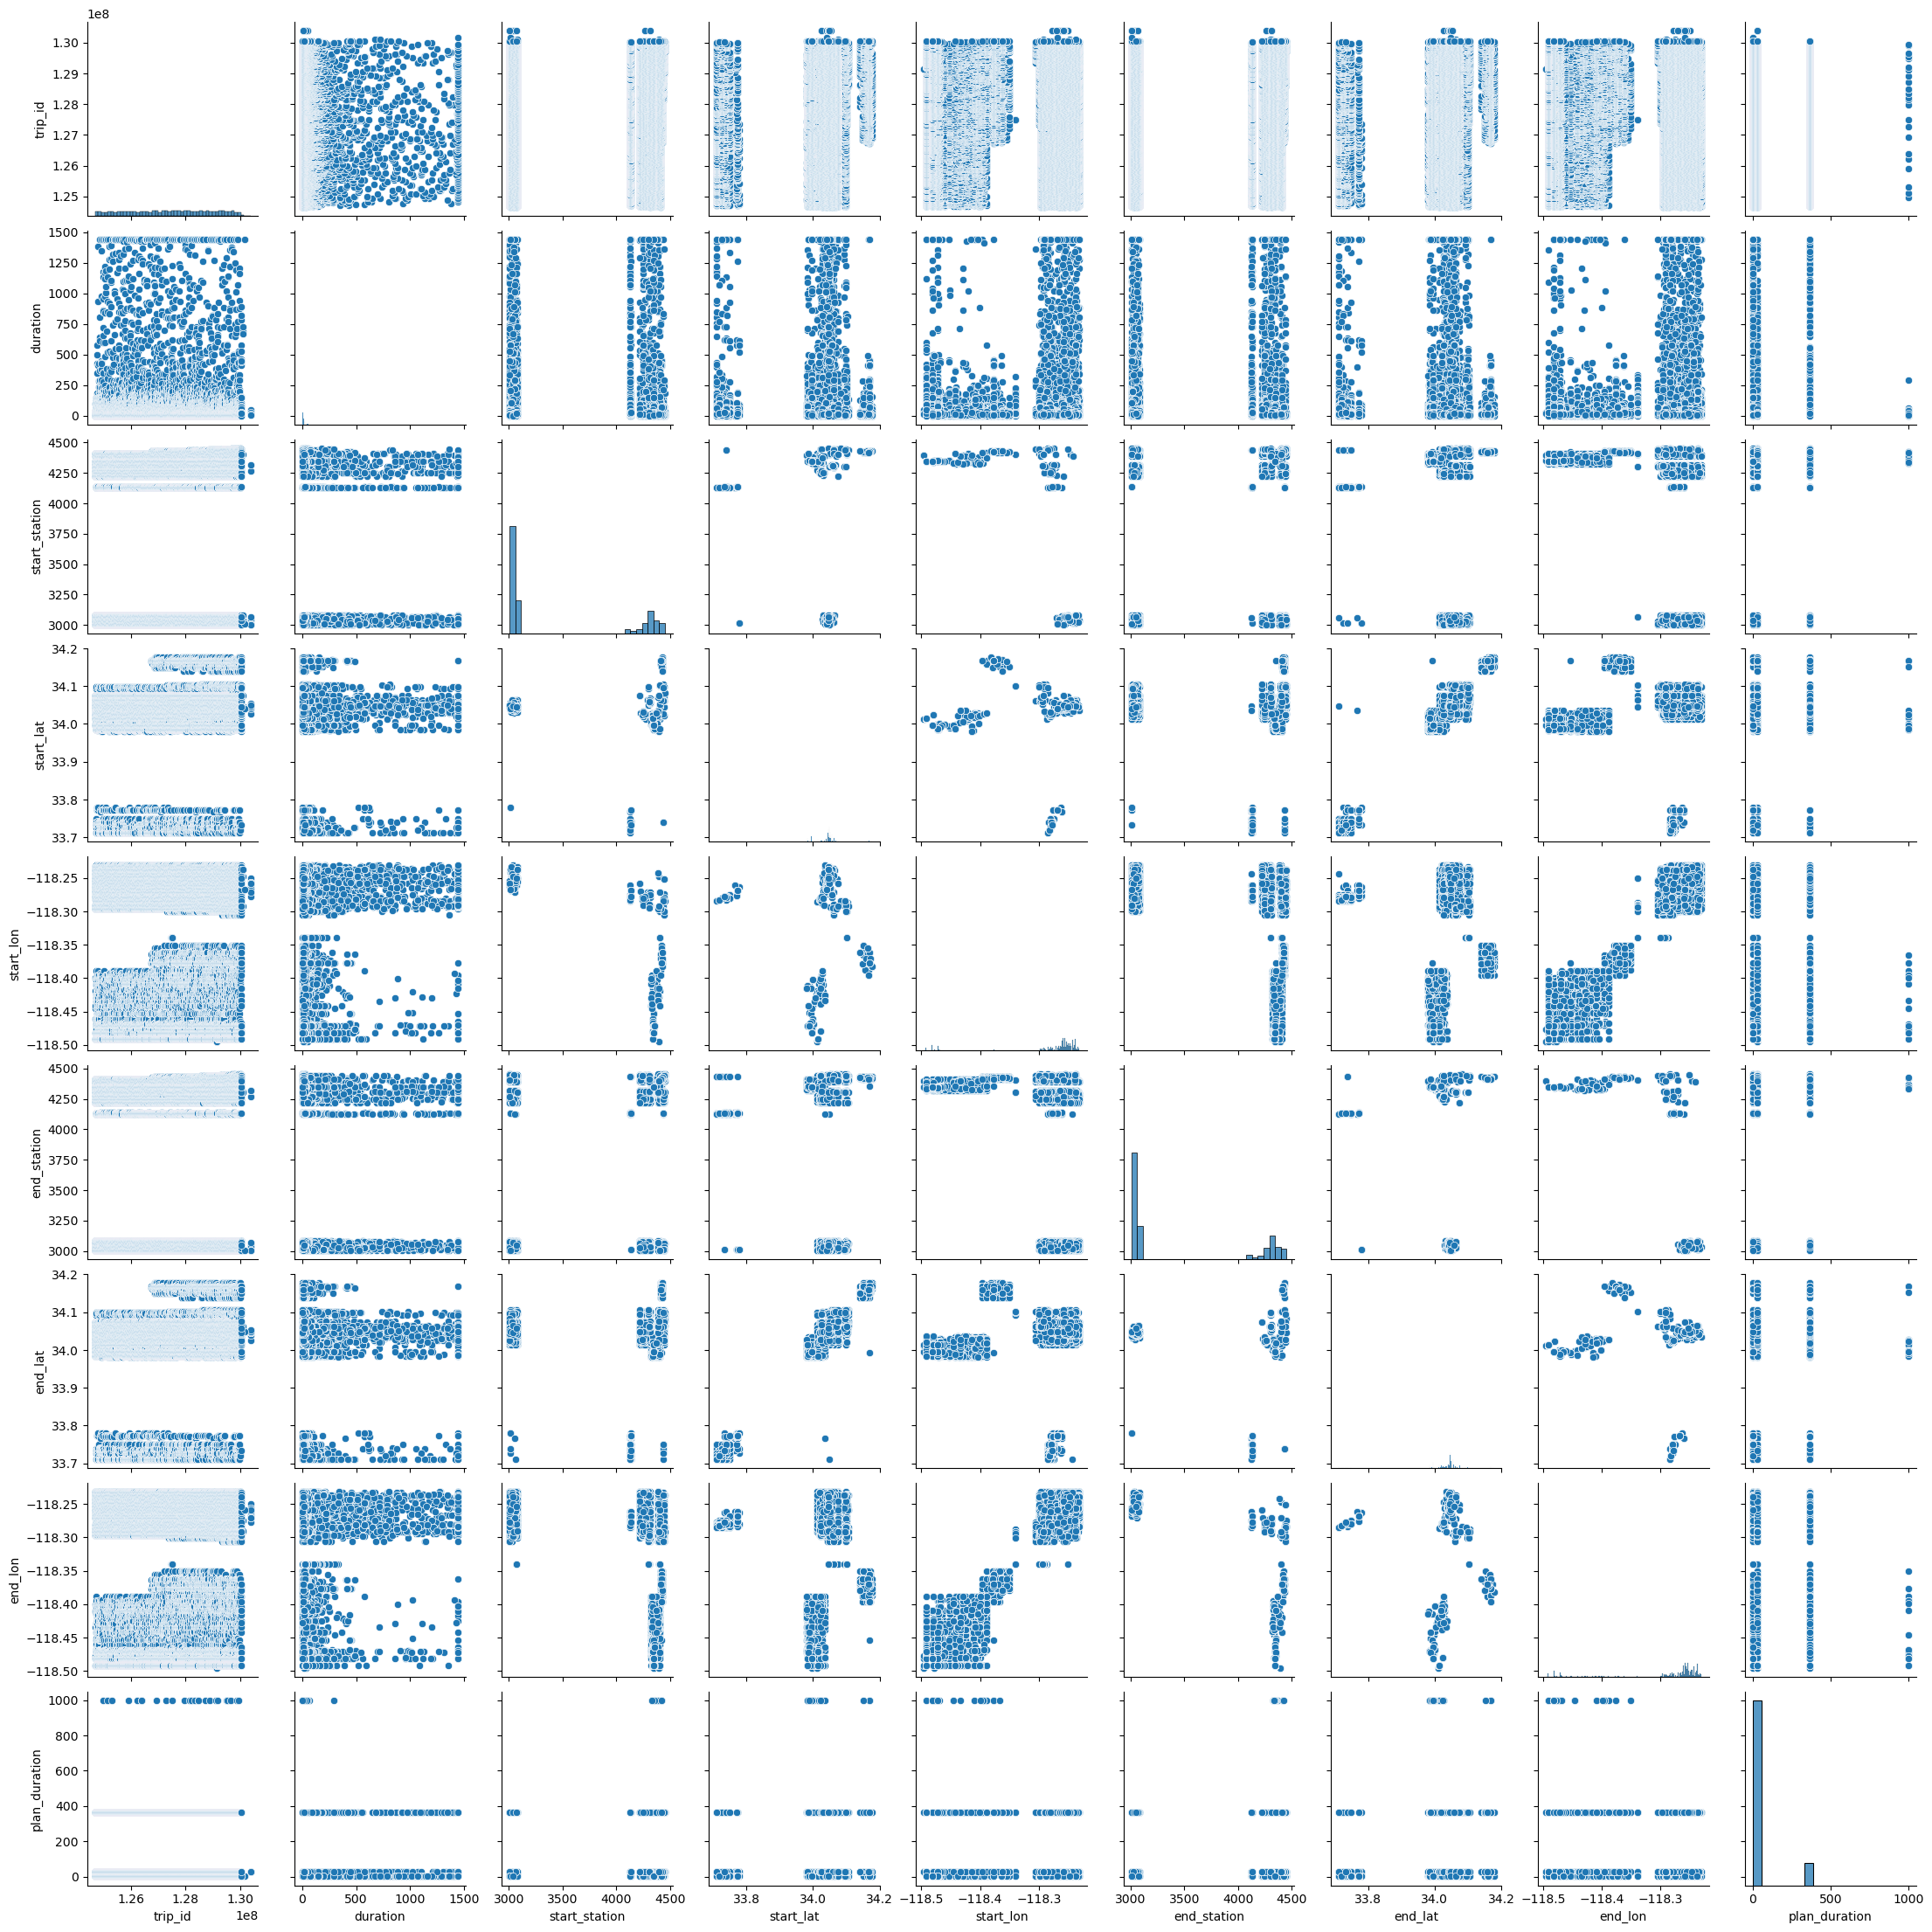

In [15]:
sns.pairplot(metrodata2) #code to generate a series of scatter plots for the metro data

The scatter plots are useful for assessing the strength and direction of the correlation between variables. The slope and direction of the points in the scatter plot indicate the nature of the relationship - whether it's positive, negative, or shows no correlation.

#### 1.4.2 Correlation Heatmap

We also explore the correlation between selected features in the dataset to unveil potential relationships and dependencies. 

The chosen columns, including 'duration', 'start latitude' (start lat), 'start longitude' (start_lon), 'end latitude' (end_lat), 'end longitude' (end_lon),' and 'plan duration', represent key aspects of each bicycle trip. 

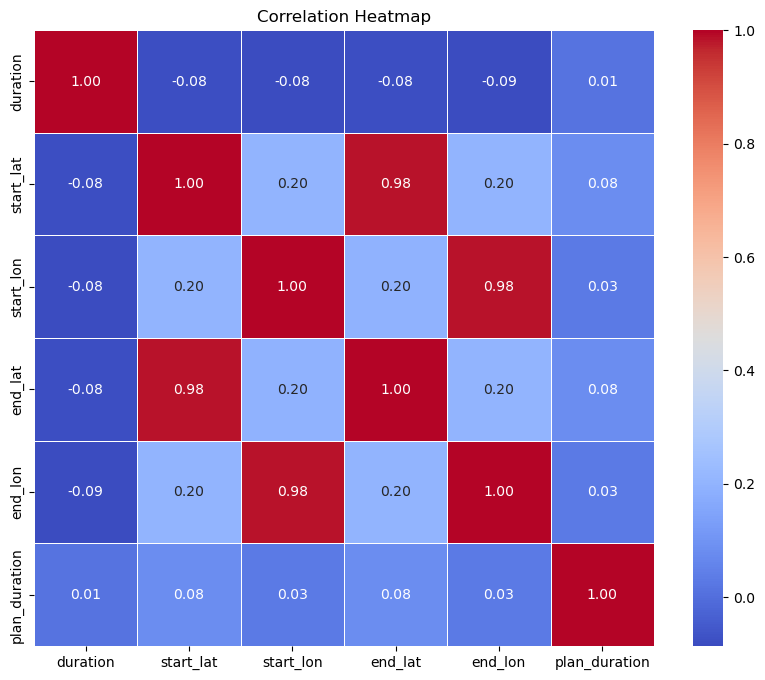

In [16]:
# Selecting the relevant columns from the dataset for the correlation analysis
selected_columns_corr = ['duration', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'plan_duration']

# Subset of the dataset with selected columns
correlation_data = metrodata2[selected_columns_corr] 

# Correlation matrix calculation and heatmap plot
correlation_matrix = correlation_data.corr() 
plt.figure(figsize=(10, 8)) # Setting the figure size for better visualisation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap') # plot title 
plt.show() # show plot

Visualising the correlation matrix through a heatmap aloows us to identify patterns and comprehend the degree of association between these selected variables. 

This exploration provides valuable insight into how different factors can influence or correlate with each other within the context of bike-sharing journeys.

#### 1.4.3 Duration Histogram 

Creating a histogram is a valuable technique that enhances our understanding of a dataset's distribution. Histograms provide a detailed visual representation by presenting the frequency of data points within specific intervals or bins. This graphical tool not only reveals the shape and central tendency of the data but also highlights patterns, outliers, and underlying structures.


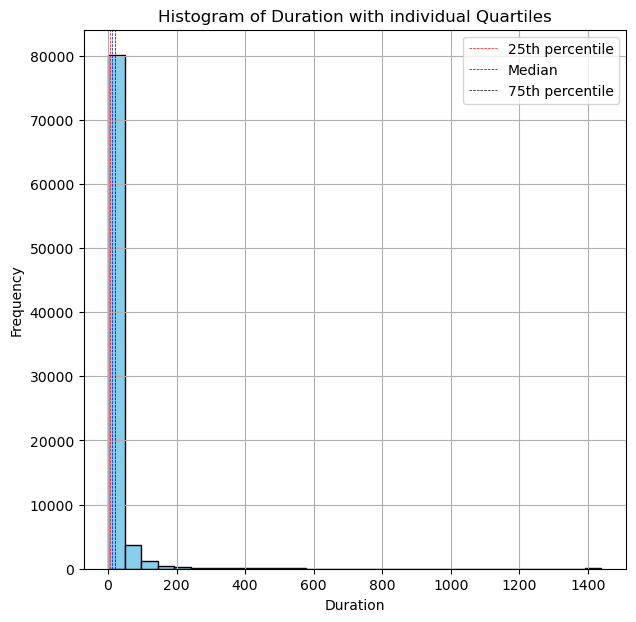

In [18]:
duration_stats = metrodata2['duration'].describe(percentiles=[.25, .5, .75])

# Histogram plot and quartiles
metrodata2['duration'].hist(figsize=(7,7), bins=30, color='skyblue', edgecolor='black')

# vertical dashed line to represent each individual quartile 
plt.axvline(duration_stats['25%'], color='red', linestyle='dashed', linewidth=0.5, label='25th percentile') 
plt.axvline(duration_stats['50%'], color='blue', linestyle='dashed', linewidth=0.5, label='Median')
plt.axvline(duration_stats['75%'], color='black', linestyle='dashed', linewidth=0.5, label='75th percentile')
plt.xlabel('Duration') # X-axis labels
plt.ylabel('Frequency') # Y-axis labels 
plt.title('Histogram of Duration with individual Quartiles') 
plt.legend()
plt.show()

Histograms effectively convey the spread of values across a range and provide a more granular perspective than summary statistics alone. By subdividing the data into intervals, histograms illustrate the density of occurrences, enabling the identification of peaks, tails, or clusters within the distribution.

Moreover, histograms complement other visualisation methods, such as boxplots, by offering a continuous view of the data density. This can be particularly insightful when exploring datasets with various patterns, asymmetries, or concentrations.

#### 1.4.4 Outlier Analysis 

Boxplots assist in visualising the spread of the data, showcasing key metrics like the median, quartiles, and the presence of potential outliers.

The following method calculates the interquartile range (IQR) as a measure of data spread. A threshold (1.5 times the IQR) is defined to identify values beyond which data points are considered outliers. Subsequently, outliers are identified based on this threshold.

These outliers are then removed from the dataset, resulting in a new DataFrame without the identified outlier values.


Outliers in the 'duration' column:
       duration
14           98
36           44
133         427
135         930
160         151
...         ...
92097       726
92100       450
92111       151
92112      1440
92114       147

[7547 rows x 1 columns]


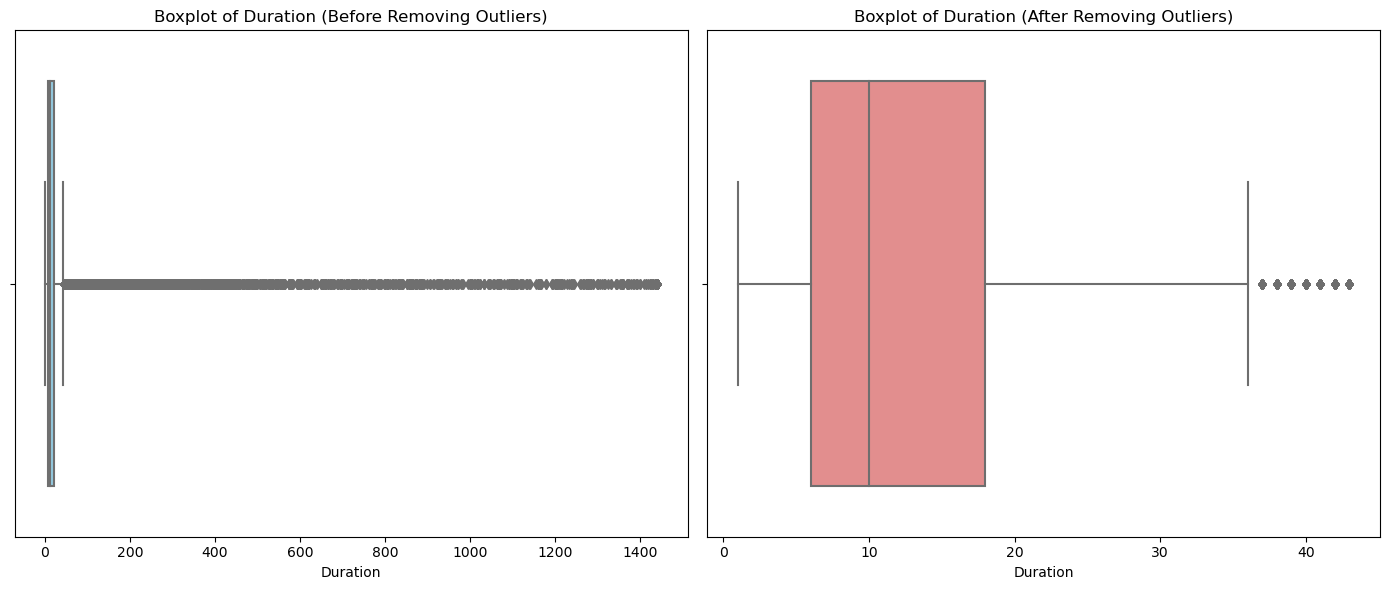

In [19]:
# Boxplots of duration distribution before removing outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # generate subplot for comparison 
sns.boxplot(x=metrodata2['duration'], color='skyblue')
plt.title('Boxplot of Duration (Before Removing Outliers)')
plt.xlabel('Duration')

# Outlier identification
Q1 = metrodata2['duration'].quantile(0.25)
Q3 = metrodata2['duration'].quantile(0.75)
IQR = Q3 - Q1
thres = 1.5 # Threshold defined for identifying outliers
outliers = metrodata2[(metrodata2['duration'] < Q1 - thres * IQR) | (metrodata2['duration'] > Q3 + thres * IQR)]

# Details of identified outliers for monitoring purposes
print("Outliers in the 'duration' column:")
print(outliers[['duration']])

# Removing outliers
metrodata2_no_outliers = metrodata2[~metrodata2['duration'].isin(outliers['duration'])] 

# Boxplot of duration distribution after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=metrodata2_no_outliers['duration'], color='lightcoral') #color 'lightcoral' distinguishes this boxplot from the one before outlier removal.
plt.title('Boxplot of Duration (After Removing Outliers)')
plt.xlabel('Duration')

plt.tight_layout() #optimize arrangement of subplots, ensuring a visually appealing display.
plt.show()

From the previous section, we visually assess the distribution for the duration column, aiding in the identification of potential outliers. The left subplot displays a boxplot representing the distribution, while the right subplot of the figure displays a new boxplot  after removing outliers.

The removal of outliers aims to address extreme values that might impact subsequent analyses. In summary, this method offers a comprehensive approach to handling outliers in the 'duration' column, involving visualisation, identification, removal, and subsequent visualisation of the refined distribution. We also compare the duration histogram and inspect the kernel desity after removing outliers. 

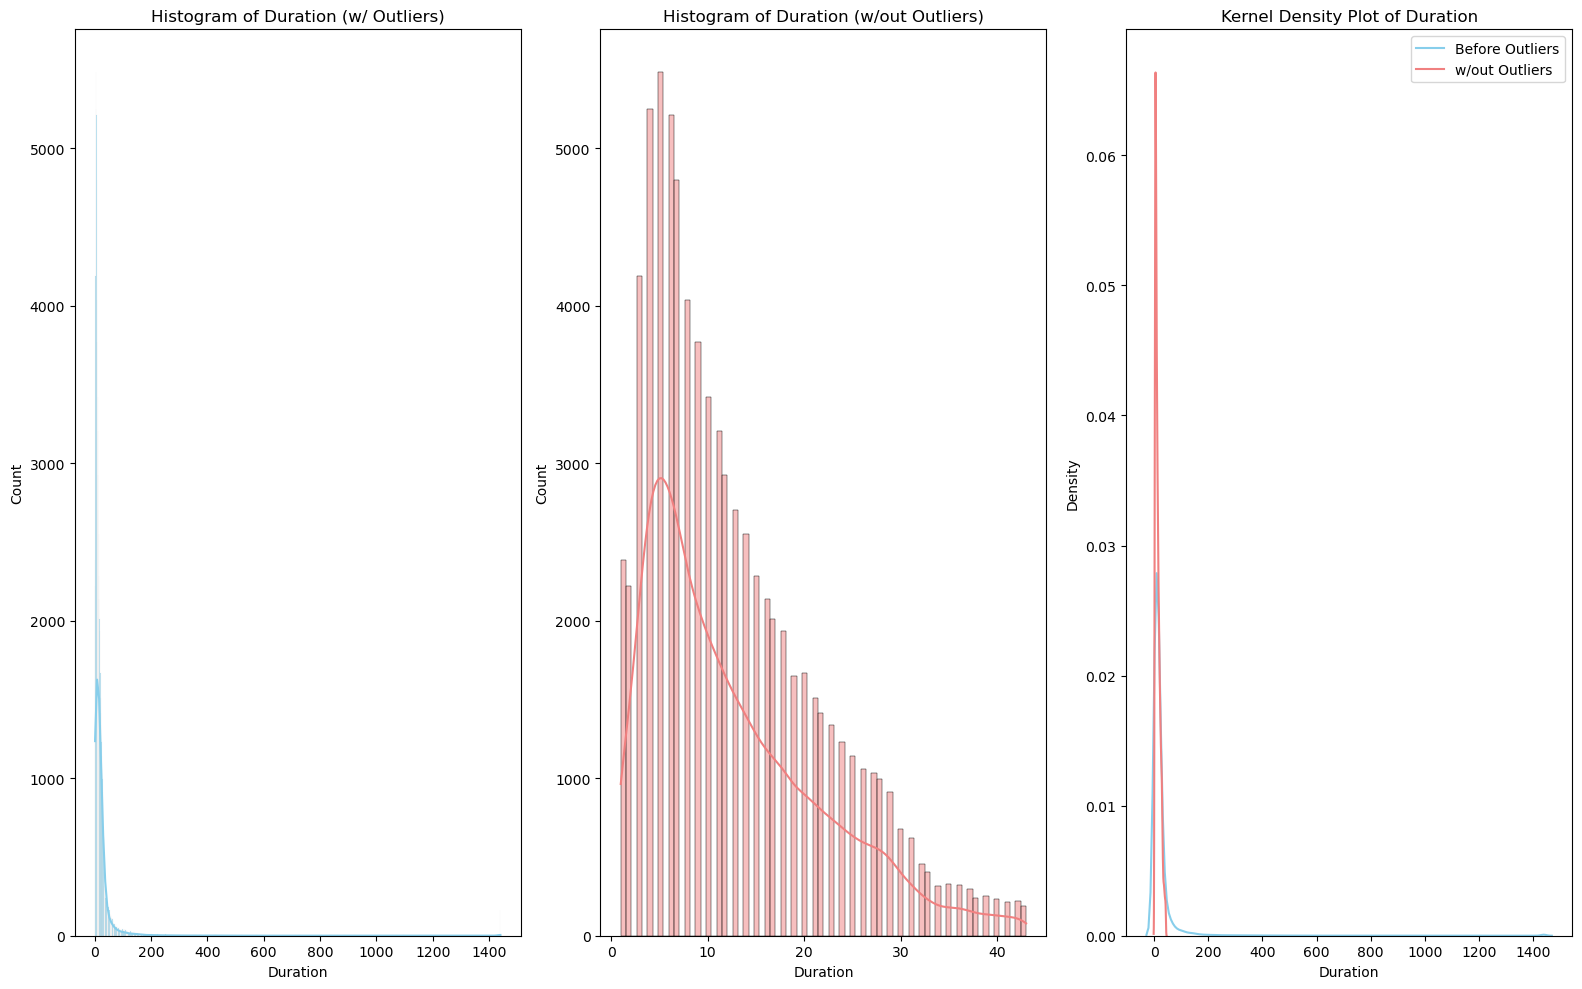

In [20]:
plt.figure(figsize=(16, 10))

# histogram before removing outliers
plt.subplot(1, 3, 1)
sns.histplot(metrodata2['duration'], kde=True, color='skyblue')
plt.title('Histogram of Duration (w/ Outliers)')
plt.xlabel('Duration')

# histogram after removing outliers
plt.subplot(1, 3, 2)
sns.histplot(metrodata2_no_outliers['duration'], kde=True, color='lightcoral')
plt.title('Histogram of Duration (w/out Outliers)')
plt.xlabel('Duration')

# Kernel density plot
plt.subplot(1, 3, 3)
sns.kdeplot(metrodata2['duration'], color='skyblue', label='Before Outliers')
sns.kdeplot(metrodata2_no_outliers['duration'], color='lightcoral', label='w/out Outliers')
plt.title('Kernel Density Plot of Duration')
plt.xlabel('Duration')
plt.legend() #helps differentiate between the distribution before outliers were removed and the refined distribution
plt.tight_layout()
plt.show()

The first subplot on the left displays the histogram of the 'duration' column before outlier removal, offering a visual representation of the frequency of different duration values. The predominant peak indicates the most common duration range.

The second subplot in the middle illustrates a histogram of the 'duration' column after removing outliers. Comparing this histogram with the previous one allows us to observe changes in the distribution shape and concentration, suggesting an influence on the peak or central tendency.

The third subplot on the right presents a kernel density plot comparing the distributions before and after outlier removal. The overlapping KDEs offer a clearer view of how the central tendencies and shapes of the distributions differ. Divergence or convergence areas indicate changes in the data distribution due to outlier removal.

#### 1.4.5 Boxplots

We generate additional boxplots to delve into the distribution of trip durations across different categorical variables in the dataset. 

The first boxplot delves into the distribution of trip durations based on passholder type, offering insights into trip durations for the six distinct passholder plans available. The second boxplot explores duration distribution across trip group categories, providing clarity on differences in trip durations between the 'One way' and 'Round Trip' categories. 

Finally, the third boxplot examines the distribution of duration by bike type, visually representing variations in trip duration across the three types of bikes offered by the service. 


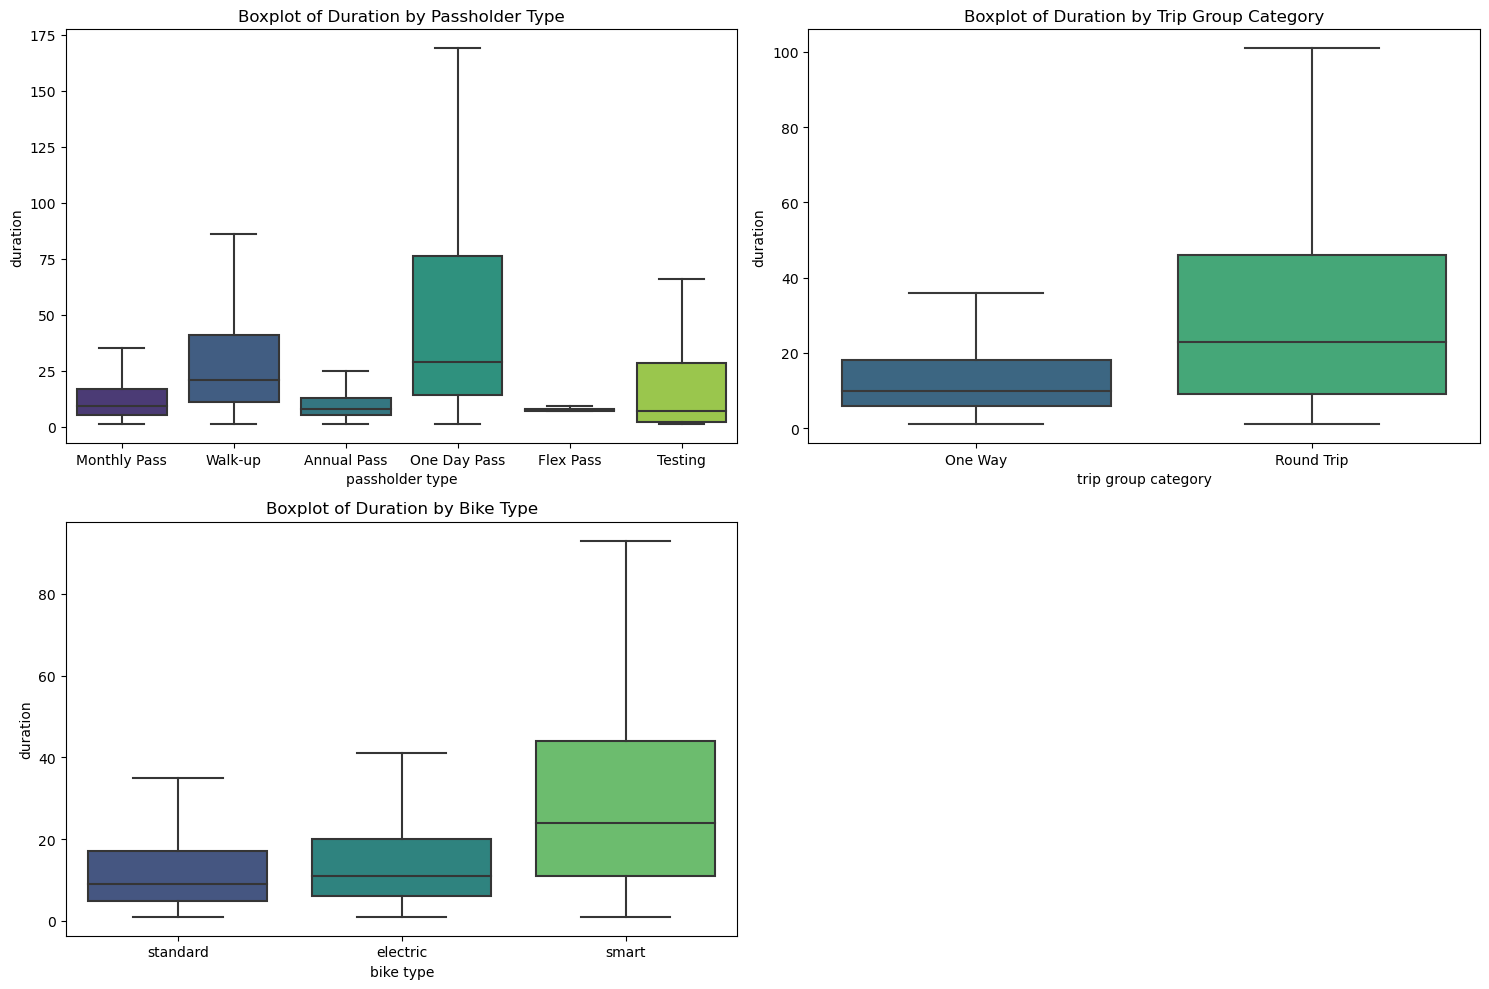

In [21]:
plt.figure(figsize=(15, 10))

# Create subplots 
plt.subplot(2, 2, 1)
sns.boxplot(x='passholder_type', y='duration', data=metrodata2, showfliers=False, palette='viridis')
plt.title('Boxplot of Duration by Passholder Type')
plt.xlabel('passholder type')
plt.ylabel('duration')

# subplots for the second boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x='trip_route_category', y='duration', data=metrodata2, showfliers=False, palette='viridis')
plt.title('Boxplot of Duration by Trip Group Category')
plt.xlabel('trip group category')
plt.ylabel('duration')

plt.subplot(2, 2, 3)
sns.boxplot(x='bike_type', y='duration', data=metrodata2, showfliers=False, palette='viridis')
plt.title('Boxplot of Duration by Bike Type')
plt.xlabel('bike type')
plt.ylabel('duration')

plt.tight_layout() 
plt.show()

These visualisations offer nuanced insights into the diverse patterns and characteristics of the bike-sharing service by examining how trip durations vary across different segments of the dataset.

The analysis of passholder types reveals intriguing variations in trip durations, suggesting potential distinctions in user behavior and preferences among the six passholder plans. Similarly, the examination of trip group categories elucidates notable differences in trip durations between 'One way' and 'Round Trip' categories, hinting at varying temporal patterns in these distinct journey types. 

The boxplot for the bike types provides a detailed understanding of how trip durations differ across standard pedal-powered bikes, electric-assist bikes, and smart bikes, potentially indicating diverse user experiences with different bike models.

These findings underscore the complexity of factors influencing trip durations within the bike-sharing service, offering valuable insights for service optimisation and user-centric enhancements. Future analyses and strategic decisions from the service can leverage these observations to tailor services, improve user experiences, and ensure efficient resource allocation.

#### 1.4.6 Pie Charts

We created pie charts to visually represent the distribution of passholder types and bike types. This visual representation enables a clear understanding of the proportions within each category for the two variables.

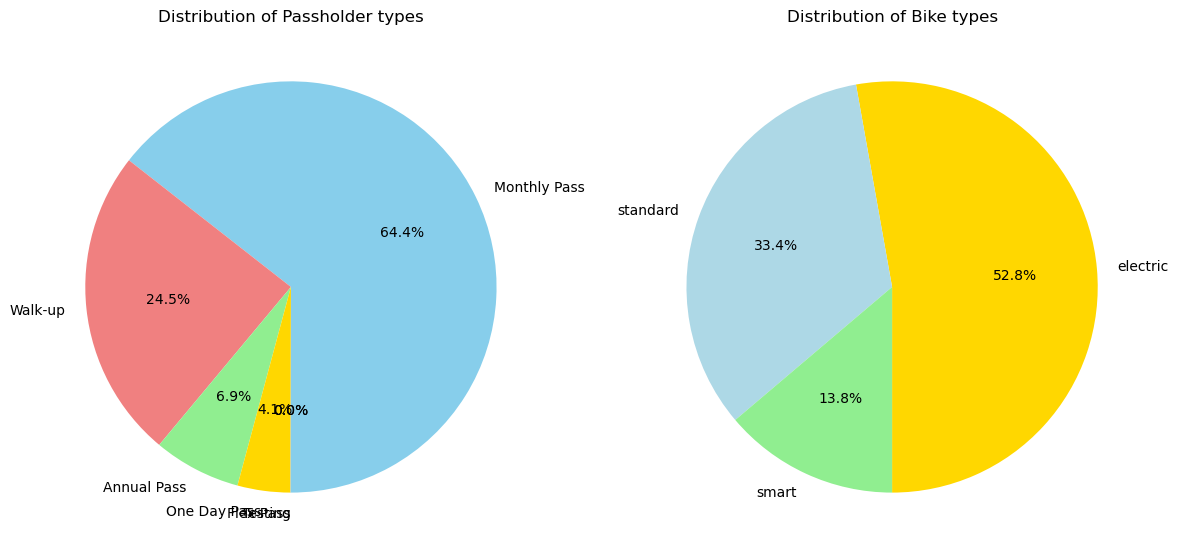

In [22]:
#calculating the counts for both variables 
passholder_counts = metrodata2['passholder_type'].value_counts()
bike_type_counts = metrodata2['bike_type'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6)) # Create subplots

# Plot 1st pie chart for 'passholder_type'
axs[0].pie(passholder_counts, labels=passholder_counts.index, autopct='%1.1f%%', startangle=-90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axs[0].set_title('Distribution of Passholder types')

# Plot 2nd pie chart for 'bike_type'
axs[1].pie(bike_type_counts, labels=bike_type_counts.index, autopct='%1.1f%%', startangle=-90, colors=['gold', 'lightblue', 'lightgreen'])
axs[1].set_title('Distribution of Bike types')
plt.tight_layout() 
plt.show()

The pie charts illustrate the distribution of passholder types and bike types within the dataset. 

In the 'Distribution of Passholder types' chart, Monthly passholders emerge as the majority of users, followed by Walk-Up passholders. Similarly, in the 'Distribution of Bike Types' chart, electric users dominate, with standard and smart users comprising the remaining portion.

These visualisations provide valuable insight into the relative proportions of different user and bike categories, offering an intuitive overview of the dataset's composition.

### 1.5 Discussion 

#### 1.5.1 Bike Usage Analysis 

We produce a set of visualisations to analyse bike usage patterns, average trip durations per bike, and the relationship between plan durations and passholder types. 

The first subplot features a bar chart displaying the distribution of bike usage based on the number of trips for each bike ID. offering insights into the popularity or utilization of each bike.

The second subplot in the middle presents a bar chart showcasing the average trip duration for each bike, , distinguished by the colour 'orange'. This chart helps identify variations in average trip durations across different bikes, similar to the first subplot.

The third subplot at the bottom consists of a stacked bar chart exploring the relationships between plan durations and passholder types. The stacked bars represent the number of trips for each combination of plan duration and passholder type. The chart offers insights into how different passholder types engage with various plan durations.

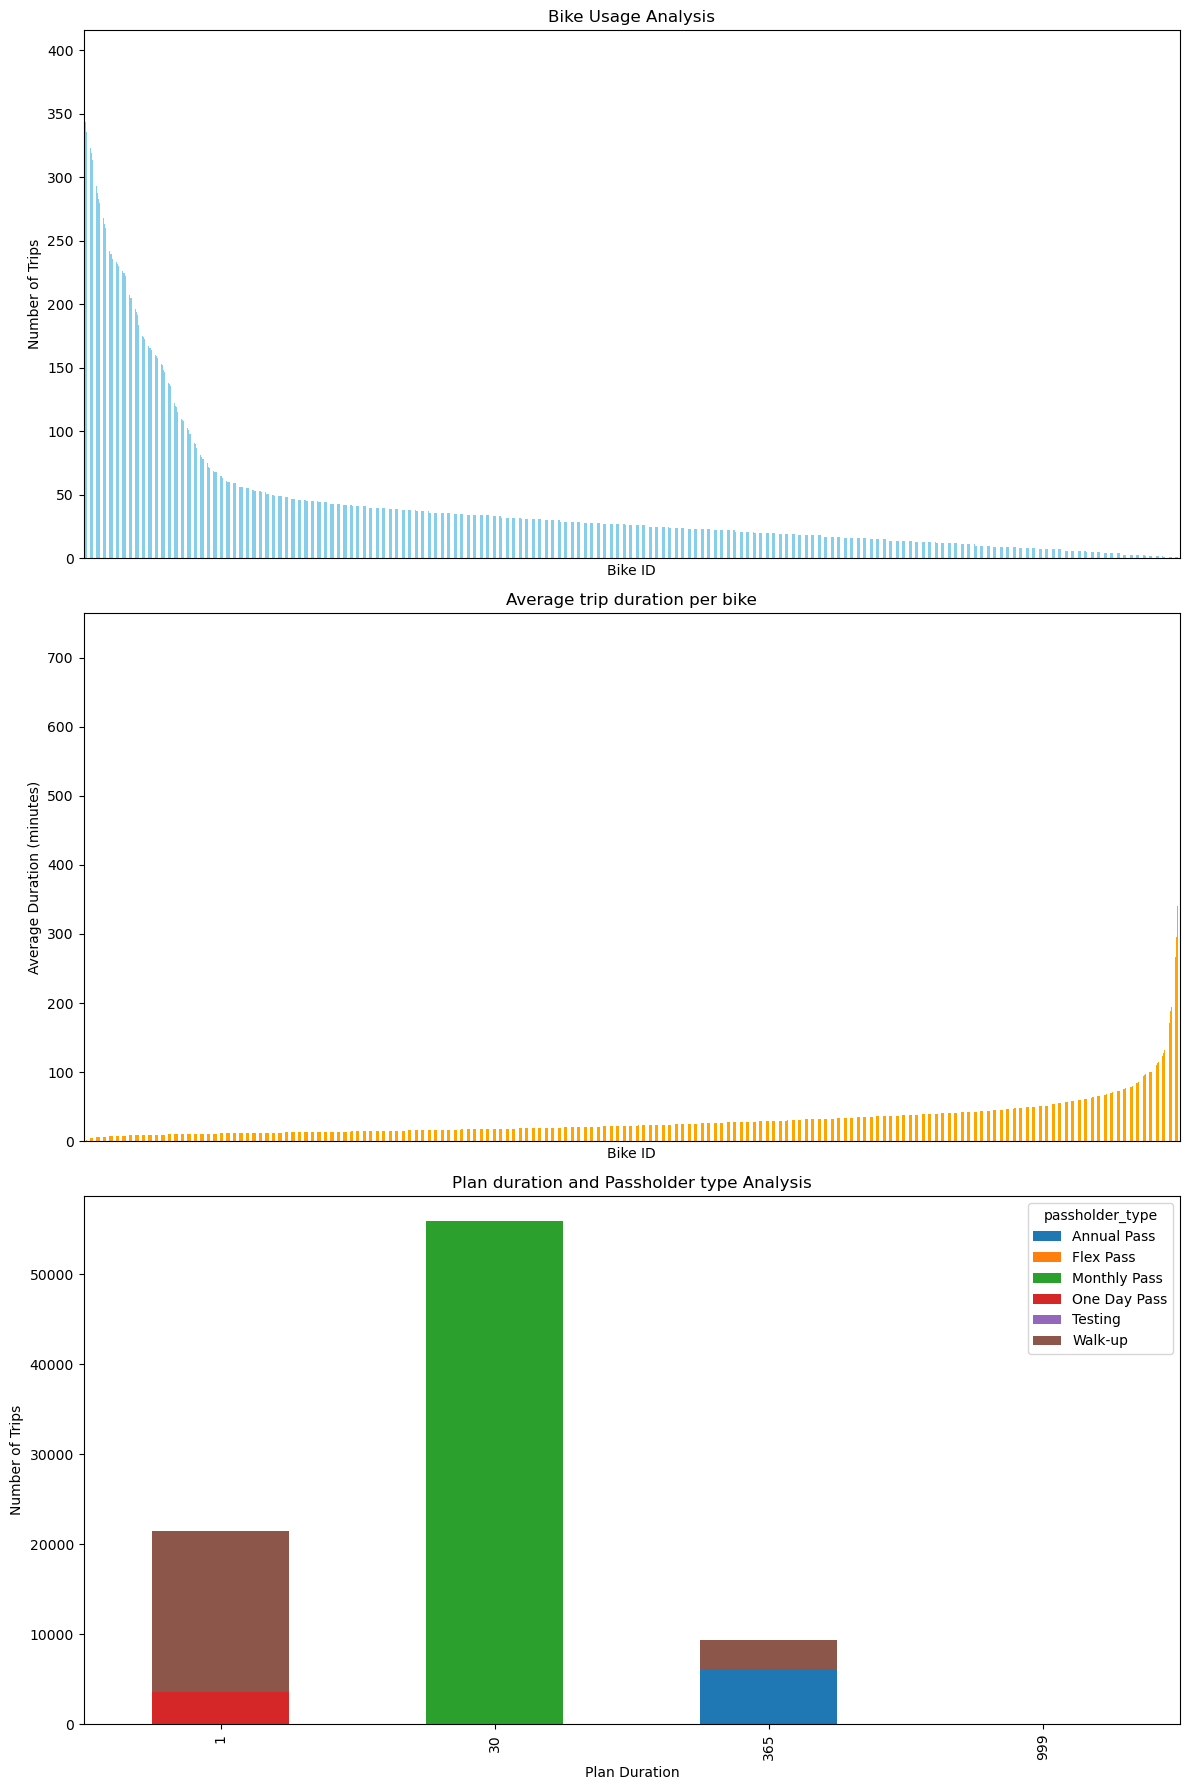

In [23]:
bike_usage = metrodata2['bike_id'].value_counts() #initialising count for the bike id

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plot distribution of bike usage
bike_usage.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Bike Usage Analysis')
axes[0].set_xlabel('Bike ID')
axes[0].set_ylabel('Number of Trips')
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

# Calculate average trip duration for each bike
# x-axis ticks are hidden to simplify the visual display.

average_duration_per_bike = metrodata2.groupby('bike_id')['duration'].mean()

# Plot the average trip duration for each bike
average_duration_per_bike.sort_values().plot(kind='bar', color='orange', ax=axes[1])
axes[1].set_title('Average trip duration per bike')
axes[1].set_xlabel('Bike ID')
axes[1].set_ylabel('Average Duration (minutes)')
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  

# Plan duration and passholder types
metrodata2.groupby(['plan_duration', 'passholder_type']).size().unstack().plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Plan duration and Passholder type Analysis')
axes[2].set_xlabel('Plan Duration')
axes[2].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()

The visualisations collectively offer a comprehensive overview of bike usage patterns, average trip durations, and the interplay between plan durations and passholder types. This visual exploration of key metrics related to bike usage provides valuable insights into patterns and variations within the dataset. The three subplots together provide a holistic view of the analyzed aspects of the bike-sharing data.

In the first subplot, the distribution of bike usage based on the number of trips for each bike ID is revealed. Peaks in the bar chart may indicate frequently used bikes, while lower bars suggest less-utilized bikes. Further analysis could involve identifying specific bikes with unusually high or low usage, potentially influencing maintenance or retirement decisions.

The second subplot illustrates the average trip duration for each bike, highlighting diversity in trip durations across bikes. Bikes with longer average trip durations might be associated with leisurely rides, while those with shorter durations could be linked to more utilitarian use. This variation informs decisions related to bike maintenance, usability, and user preferences.

The third subplot, a stacked bar chart, explores the relationships between plan durations and passholder types. Each stacked bar represents the total number of trips for a specific combination of plan duration and passholder type. Varied colours within each bar denote the distribution of trips among different passholder types. This chart provides insights into how different passholder types engage with various plan durations, helping understand user preferences and behavior. Such information is valuable for optimizing subscription plans and tailoring offerings to different user segments.


#### 1.5.2 Cross Tabulation 

We further explore the relationship between passholder types and bike types through a combination of a cross-tabulation [1] and a stacked bar chart.

The code generates a cross-tabulation between the 'passholder_type' and 'bike_type' columns of the metrodata2 DataFrame, providing a tabular summary of counts for each passholder and bike type combination.

Utilizing Seaborn, a heatmap is generated to visually represent the cross-tabulation. Each cell corresponds to a passholder and bike type combination, with color intensity indicating the count. Annotations within cells enhance the interpretability of the heatmap.

Subsequently, a stacked bar chart is created based on the same cross-tabulation. The x-axis represents passholder types, while the y-axis represents the count of occurrences. Each bar is stacked to visualise the distribution of bike types within each passholder category.

The cross-tabulation offers a quick overview of how passholder types correlate with different bike types, while the stacked bar chart provides a more detailed breakdown. We can readily identify patterns, such as prevalent bike types among different passholder categories and any associations between specific passholder types and particular bike types.

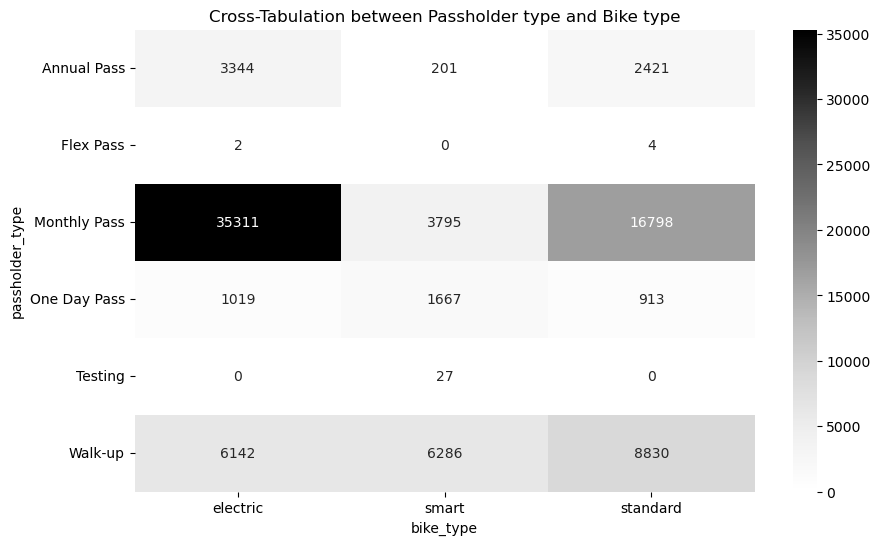

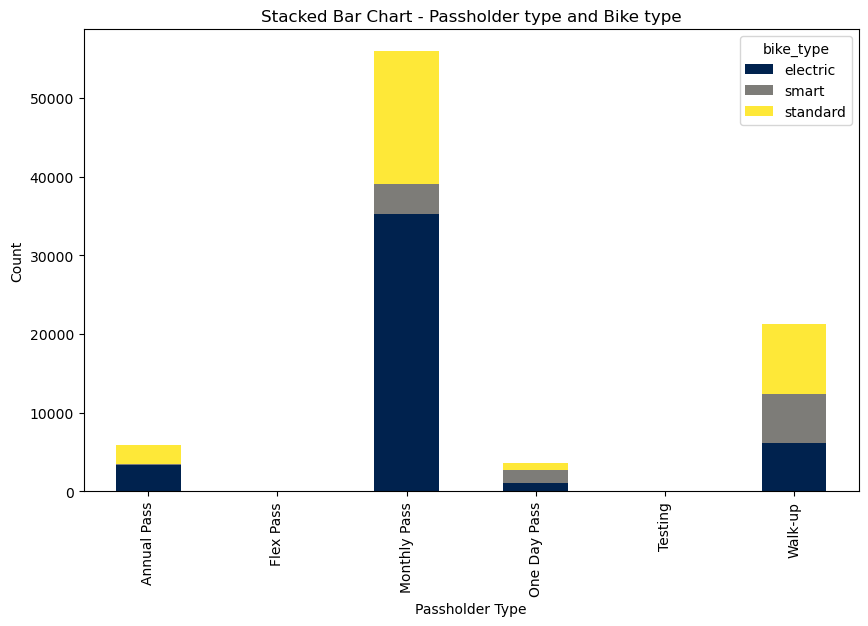

Cross-Tabulation between Passholder type & Bike type:
bike_type        electric  smart  standard
passholder_type                           
Annual Pass          3344    201      2421
Flex Pass               2      0         4
Monthly Pass        35311   3795     16798
One Day Pass         1019   1667       913
Testing                 0     27         0
Walk-up              6142   6286      8830


In [24]:
passholder_bike_crosstab = pd.crosstab(metrodata2['passholder_type'], metrodata2['bike_type'])

# Heatmap for the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(passholder_bike_crosstab, annot=True, cmap='Greys', fmt='d')
plt.title('Cross-Tabulation between Passholder type and Bike type')
plt.show()

# Stacked bar chart for the cross-tabulation
passholder_bike_crosstab.plot(kind='bar', stacked=True, colormap='cividis', figsize=(10, 6))
plt.title('Stacked Bar Chart - Passholder type and Bike type')
plt.xlabel('Passholder Type')
plt.ylabel('Count')
plt.show()

# Display cross-tabulation
print("Cross-Tabulation between Passholder type & Bike type:")
print(passholder_bike_crosstab)


The cross-tabulation results between passholder types and bike types offer a detailed breakdown of occurrences for each combination. These observations provide valuable insights into how various passholder types interact with the available bike types, shedding light on potential patterns and preferences within the dataset.

Notably, electric bikes emerge as the most frequently used bike type across passholder categories, particularly favoured by Monthly Pass holders. Specific preferences for certain bike types are observed among passholders like Annual Pass holders, while others, such as Walk-up users, exhibit more varied preferences. Flex Pass holders, on the other hand, show minimal participation in bike usage compared to other passholder types.

A distinct pattern is observed among Testing passholders, who exclusively use smart bikes, providing unique insights into their usage behavior.


#### 1.5.3 Time-Series Analysis 

We can prepare and visualise a time series of daily bike trips based on the 'start_time' column in the metrodata2 DataFrame. This plot will offer insights into the trend of bike trips over time, enabling us to observe patterns and fluctuations.

/var/folders/gh/gl844sg14c19zxsbgbxvzl380000gn/T/ipykernel_79709/2871844735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrodata4['start_time'] = pd.to_datetime(metrodata4['start_time'])
/var/folders/gh/gl844sg14c19zxsbgbxvzl380000gn/T/ipykernel_79709/2871844735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrodata4['end_time'] = pd.to_datetime(metrodata4['end_time'])


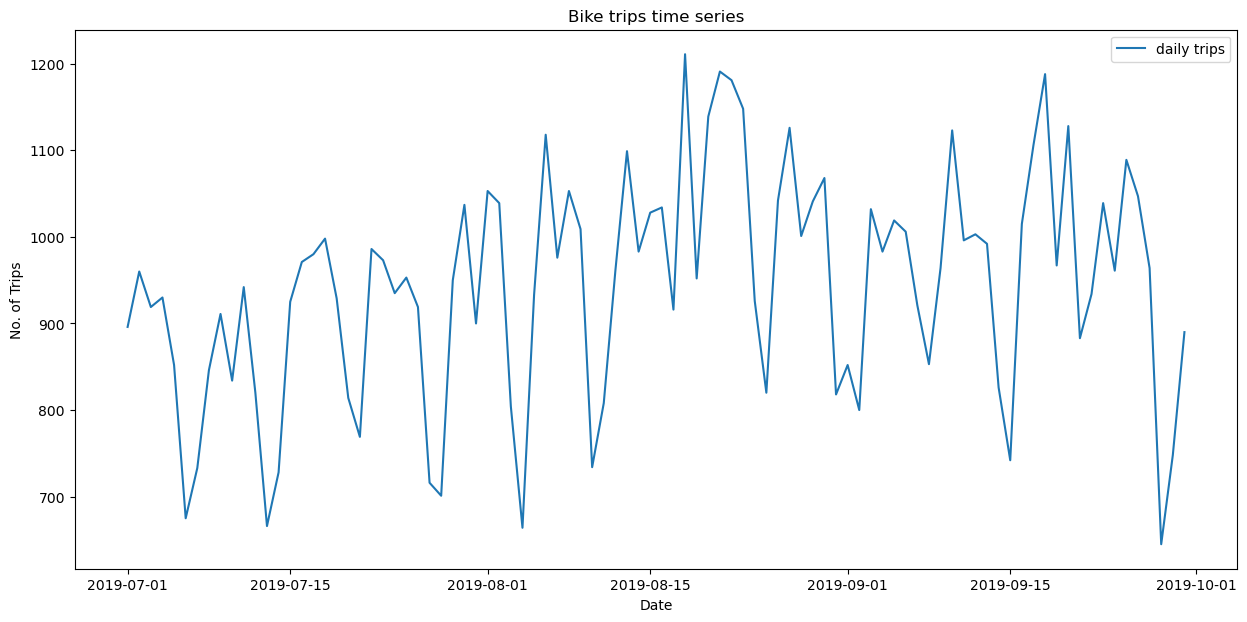

In [25]:
from datetime import datetime # import to convert 'start_time' and 'end_time' columns to datetime format

metrodata4 = metrodata2
metrodata4['start_time'] = pd.to_datetime(metrodata4['start_time'])
metrodata4['end_time'] = pd.to_datetime(metrodata4['end_time'])

# Set 'start_time' as index 
metrodata4.set_index('start_time', inplace=True)

# Resample data based on specific frequency 
daily_resampled = metrodata4.resample('D').size() #(daily in this case)

# Plot time series
plt.figure(figsize=(15, 7))
plt.plot(daily_resampled, label='daily trips')
plt.title('Bike trips time series')
plt.xlabel('Date')
plt.ylabel('No. of Trips')
plt.legend()
plt.show()

The graph illustrates the general trend of daily bike trips over the observed period. Upward trends suggest increasing popularity or ridership, while downward trends indicate a potential decrease. Repeating patterns or cycles in the graph may signify seasonality, reflecting variations in bike usage based on factors like weather, holidays, or events. Peaks and troughs at regular intervals might indicate weekly or monthly patterns.

Unusual spikes or dips could represent exceptional events, holidays, or anomalies affecting bike trip frequency. The overall height of the graph reflects the total volume of daily bike trips, offering insights into the system's usage intensity.

Examining the graph might reveal specific time periods with notable changes, providing insights into factors influencing bike usage. Identifying consistent patterns could assist in optimising services or predicting future demand.

### 1.6 Conclusion 

Our analysis of the bike trip data has proven to be both comprehensive and insightful, offering valuable insights that hold significant potential for enhancing services. The visualisations crafted during this analysis emerge as indispensable tools for our operations. They not only provide a clear overview of past trends but also offer ground for actionable insights that can drive strategic decisions for the future.

The applications of our findings can extend across various domains, notably in asset management, budgeting, and cost optimisation. By leveraging the patterns identified in the data, we can make informed decisions on resource allocation, ensuring efficient asset utilisation and effective budget planning. The data-driven approach allows us to streamline costs effectively, contributing to the overall sustainability and profitability of our service.

Looking ahead, a strategic exploration of station locations becomes a pivotal aspect of our decision-making process. Analysing the geographical distribution of station visits can guide us in determining optimal locations for future installations. This forward-looking approach ensures that our service expansion aligns with user demand, promoting accessibility and user satisfaction.

Furthermore, delving into station visit frequencies opens avenues for proactive maintenance strategies. Identifying stations that are visited more often enables us to prioritise and schedule timely servicing, enhancing the overall reliability of our fleet. This predictive maintenance approach can not only minimise disruptions but also contributes to a seamless and dependable experience for our users.

Taking our analysis a step further, we can establish a usage threshold for bikes and implement a system to monitor their utilisation. By defining a threshold based on usage frequency, we can develop code that automatically flags bikes surpassing this limit. This innovative feature can not only ensure the timely maintenance of heavily used bikes but also supports our commitment to providing a high-quality and well-maintained fleet.

In summary, our analysis lays the foundation for data-driven decision-making, optimising various aspects of our bike-sharing service. Strategic expansion planning to proactive maintenance strategies, coupled to the insights gleaned from this analysis can help enhance user experience and operational efficiency.

## 2. Seed Shape Analysis (Clustering & Classification)

### 2.1 Understanding the Data

The data used in this task is sourced from the UCI Machine Learning Repository, a well-a reputable repository for datasets. The specific dataset can be accessed at http://archive.ics.uci.edu/dataset/236/seeds. To suit the requirements of the initial clustering analysis, some adjustments were made to the original dataset.

Focused on measurements of seeds from various types of plants, the dataset is stored in a file named 'seeds.csv.' It also adheres to the widely recognized comma-separated-values (CSV) format."

In [26]:
# Datafile "seeds.csv" directory addressed from the same space as our notebook.

seedsdata = pd.read_csv('./data_assignment/seeds.csv',low_memory=False) #intialise variable to manipulate the datafile

The functions '.info()' and '.describe()'  are also valuable tools for gaining insights into the nature of information contained within the data file. These features provide a rich and comprehensive overview of the dataset, offering details on data types, non-null counts, and a summary of statistics.

Specifically, the '.info()' function furnishes a concise summary of the dataset's structure, including the data types of each column and the presence of any missing values. On the other hand, the '.describe()' function generates statistical summaries, providing key metrics such as mean, standard deviation, and quartile values. These metrics provide a profound understanding of the dataset's characteristics.

In [27]:
seedsdata.info()
seedsdata.head(10) #return first 10 rows in the seeds dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove_length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


area  perimeter  compactness  length  width  asymmetry  groove_length
0  15.26      14.84        0.871   5.763  3.312      2.221          5.220
1  14.88      14.57        0.881   5.554  3.333      1.018          4.956
2  14.29      14.09        0.905   5.291  3.337      2.699          4.825
3  13.84      13.94        0.895   5.324  3.379      2.259          4.805
4  16.14      14.99        0.903   5.658  3.562      1.355          5.175
5  14.38      14.21        0.895   5.386  3.312      2.462          4.956
6  14.69      14.49        0.880   5.563  3.259      3.586          5.219
7  14.11      14.10        0.891   5.420  3.302      2.700          5.000
8  16.63      15.46        0.875   6.053  3.465      2.040          5.877
9  16.44      15.25        0.888   5.884  3.505      1.969          5.533

In [29]:
seedsdata.describe()

area   perimeter  compactness      length       width  \
count  210.000000  210.000000   210.000000  210.000000  210.000000   
mean    14.847524   14.559286     0.871000    5.628533    3.258605   
std      2.909699    1.305959     0.023594    0.443063    0.377714   
min     10.590000   12.410000     0.808000    4.899000    2.630000   
25%     12.270000   13.450000     0.857250    5.262250    2.944000   
50%     14.355000   14.320000     0.873500    5.523500    3.237000   
75%     17.305000   15.715000     0.887750    5.979750    3.561750   
max     21.180000   17.250000     0.918000    6.675000    4.033000   

        asymmetry  groove_length  
count  210.000000     210.000000  
mean     3.700200       5.408071  
std      1.503559       0.491480  
min      0.765000       4.519000  
25%      2.561500       5.045000  
50%      3.599000       5.223000  
75%      4.768750       5.877000  
max      8.456000       6.550000

We observe that the dataset comprises quantitative and continuous variables, where the information consists of measurable numerical values covering a wide range along a continuum. These variables are not confined to specific discrete values, enabling a detailed analysis of underlying patterns and trends within the dataset.

The dataset, named "seedsdata", encompasses a total of 210 entries. The average area of the seeds is approximately 14.85\\(m^2\\), with a standard deviation of 2.91\\(m^2\\), indicating moderate variability. The seeds' compactness, averaging at 0.871m, demonstrates relatively consistent packing. 

The length and width of the seeds have averages of 5.63m and 3.26m, respectively. Asymmetry, with an average of 3.70m, exhibits some variation among the seeds. The groove length has an average of 5.41m. Examining the dataset's minimum and maximum values across these features provides a comprehensive range of characteristics, offering a comprehensive view of the seed dataset.

### 2.2 Error Analysis 

We first scrutinise the data type of each attribute and assess the presence of any missing values within every feature. This involves a thorough examination of the data representation for each attribute, identifying instances where essential information may be absent or incomplete.

In [30]:
seedsdata2 = seedsdata.dropna() #data cleansing for seeds data 
seedsdata2.info #checking the data shape now we've cleansed the data

<bound method DataFrame.info of       area  perimeter  compactness  length  width  asymmetry  groove_length
0    15.26      14.84        0.871   5.763  3.312      2.221          5.220
1    14.88      14.57        0.881   5.554  3.333      1.018          4.956
2    14.29      14.09        0.905   5.291  3.337      2.699          4.825
3    13.84      13.94        0.895   5.324  3.379      2.259          4.805
4    16.14      14.99        0.903   5.658  3.562      1.355          5.175
..     ...        ...          ...     ...    ...        ...            ...
205  12.19      13.20        0.878   5.137  2.981      3.631          4.870
206  11.23      12.88        0.851   5.140  2.795      4.325          5.003
207  13.20      13.66        0.888   5.236  3.232      8.315          5.056
208  11.84      13.21        0.852   5.175  2.836      3.598          5.044
209  12.30      13.34        0.868   5.243  2.974      5.637          5.063

[210 rows x 7 columns]>

Comparing these outputs with our previous results, we confirm that there are no missing values present in the dataset. This reinforces the integrity of the data, indicating that the information is complete and ready for analysis.

### 2.3 Data Characteristics & Visualisation

#### 2.3.1 Scatter Plots

Scatter plots provide us with an overview of the dispersion and concentration of data points, offering insights into the distribution of values for each variable. This visual exploration offers a clear depiction of variability and central tendency across the dataset. 

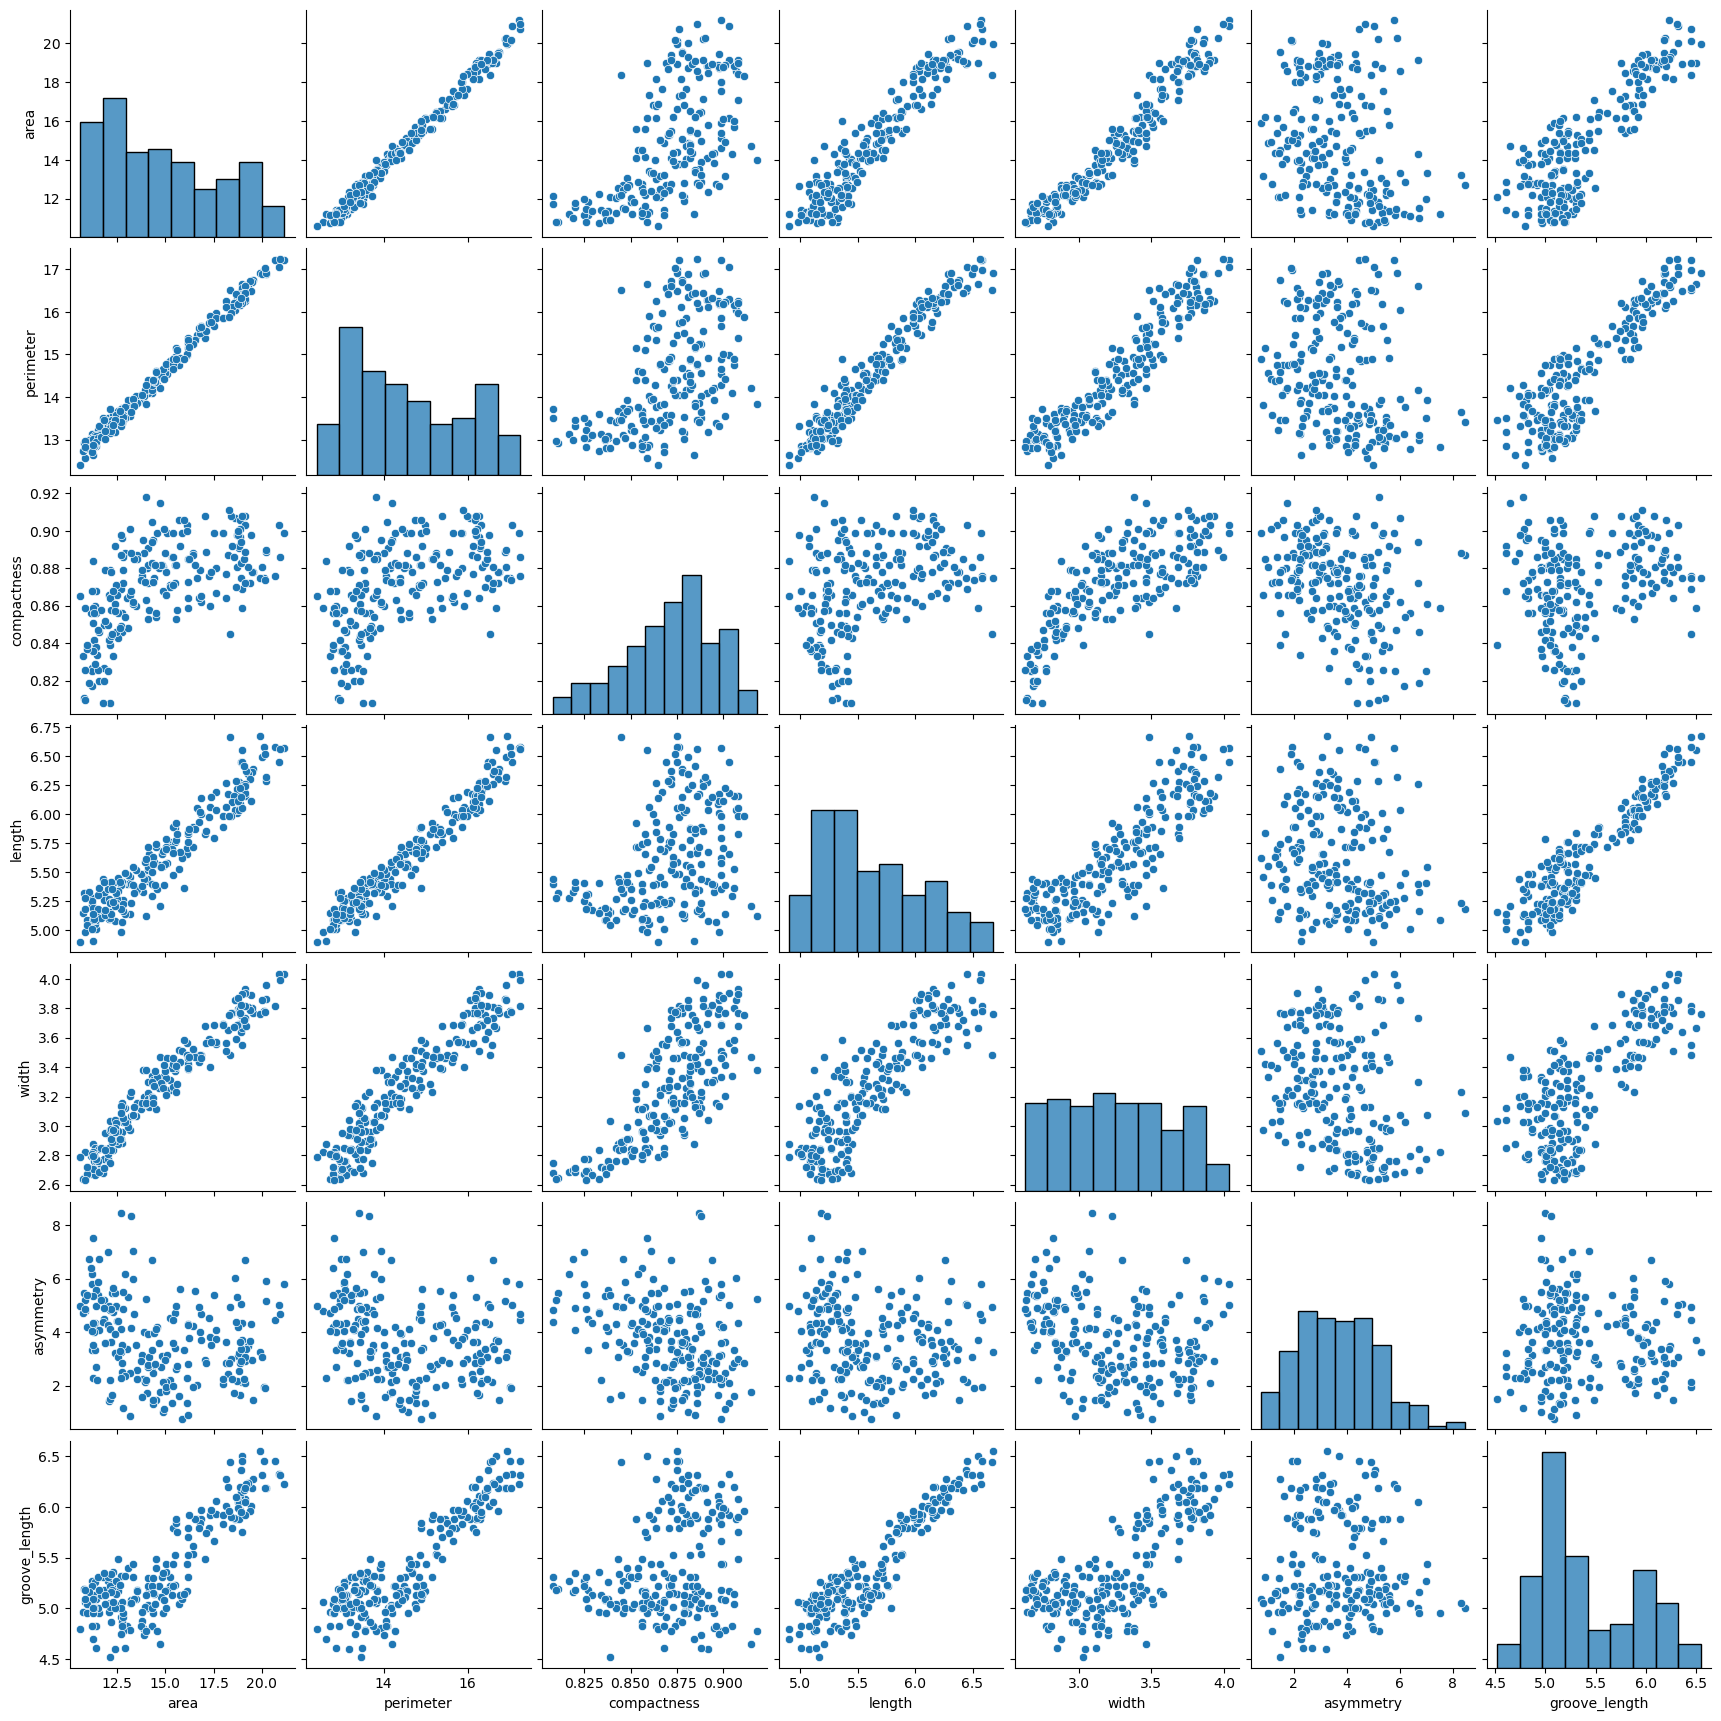

In [31]:
sns.pairplot(seedsdata)

In the context of our subsequent analyses, these scatter plots may even reveal the existence of discernible clusters or groups within the data. Such visual exploration proves beneficial for identifying potential subpopulations or categories, enhancing our understanding of potential underlying patterns in the dataset.

#### 2.3.2 Correlation Heatmap 

A correlation heatmap provides an intuitive and comprehensive visualisation of the relationships among multiple variables. Utilising a colour scale, it facilitates the identification of patterns, where stronger colours indicate stronger correlations and neutral colors indicate weaker correlations. 

This visual representation offers a concise yet insightful overview of the interdependencies within the dataset, enabling the recognition of key relationships between various variables. 

(8.0, 0.0)

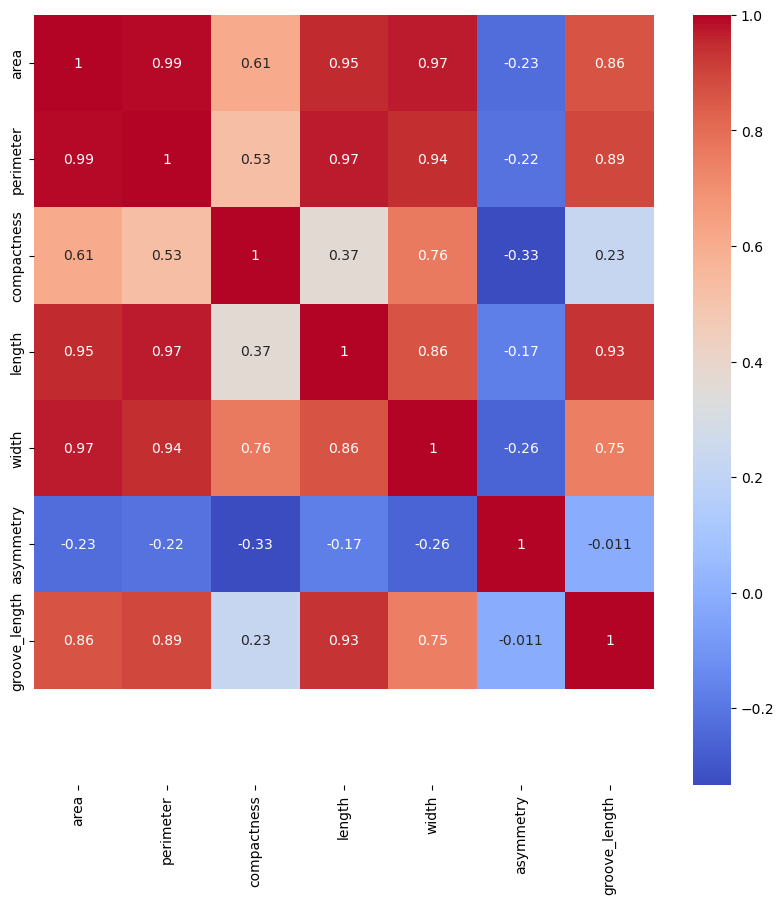

In [32]:
plt.figure(figsize=(10,10))
seeds_correlation=seedsdata.corr()
sns.heatmap(seeds_correlation,annot=True,cmap='coolwarm')
plt.ylim(8,0)

The heatmap reveals discernible clusters of variables that exhibit a notable degree of correlation, whether positive or negative. These observations can already highlight potential interrelationships and trends within the data.

### 2.4 Clustering Analysis - K-Means & Gaussian Mixture Models

We can leverage Machine Learning (ML) methods to discern the optimal model for understanding the interplay between a predictor (or independent) variable X and its impact on generating a robust response Y, within our dataset. This response Y is sometimes referred to as the dependent variable or criterion.

The overarching objective in this process is usually to unravel new relationships between X and Y, potentially  enabling us to predict Y values when confronted with new X variables in the future. This relationship is usually denoted by a function 𝑓() which contains an uncertainty 𝜖. In the context of ML, our focus is typically on finding the best model 𝑓().

In our initial exploration, we consider clustering analysis, an unsupervised ML task. Specificially, we explore K-Means and Gaussian Mixture Models to categorise akin data points within our dataset in groups called clusters. This method excels in discerning patterns within datasets that lack predefined labels, making it especially useful when datasets lack such labels.

In the context of clustering analysis, 𝑓() can encapsulate information about the centroid, size, or range of the cluster, while the uncertainty 𝜖 sheds light on the variability within the cluster. It also serves as a diagnostic tool for identifying outliers in the dataset. Although our usual focus in ML is finding the best model 𝑓(), clustering also aims to find the best groups Y within the dataset.

#### 2.4.1 K-Means Analysis -  Data preprocessing & Elbow method

We begin our exploration with the K-Means method for clustering analysis. This technique relies on minimising Euclidean distances to a central 'centroid.' It is particularly effective for unsupervised Machine Learning tasks, especially when dealing with complex structures inherent in datasets organised in distributions similar to circles and spheres.

In the K-Means clustering analysis, our initial steps involve scaling and normalising the input features of our dataset. This ensures equal weight for each feature within the dataset. Subsequently, we apply the Elbow Method to identify the optimal number of inertial points within the dataset.

/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

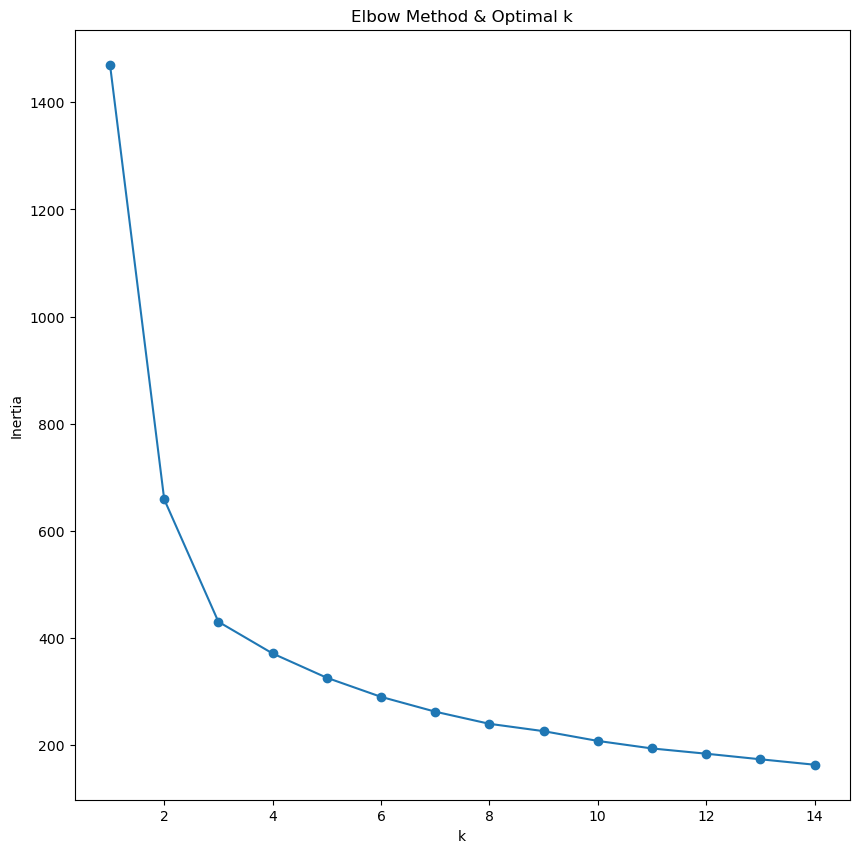

In [36]:
from sklearn.cluster import KMeans #library imported for K-Means analysis 
from sklearn.preprocessing import StandardScaler #StandardScaler imported to normalise the seedsdata

# Selecting input features for K-Means analysis and normalising data 
seeds_features = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length']
X = seedsdata[seeds_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method plot

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=100) #random state ensures reproducibility by initialising the random seed.
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method & Optimal k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


The Elbow method serves as a strategic approach for understanding the dynamics of cluster set inertia, focusing on the mean of the sum of squared distances between each data point and its respective centroid. This metric, known as the Within-Cluster Sum of Squares (WCSS), reveals the compactness and coherence of a cluster. A lower value indicates tightly packed points, signifying a more cohesive and well-defined cluster.

As the number of clusters (𝑘) increases, the inertia progressively approaches zero, eventually reaching it when the number of centroids equals the number of data points. The crux of the Elbow method lies in identifying the point at which the change in inertia decelerates, signifying diminishing returns in terms of cluster refinement.

In our graphical analysis, we discern that the optimal K-value lies between 2 and 4. This interval signifies the plausible number of clusters that strikes a balance between granularity and computational efficiency. However, it's worth noting that the "elbow" in the inertia graph may not always present itself as a distinct and unequivocal bend. Leveraging domain knowledge and complementary methods are still necessary for informed decision-making.

Recognising the inherent subjectivity in interpreting the 'elbow,' we proceed to consider alternative methods, ensuring a robust and multifaceted approach to determining the optimal number of clusters.

#### 2.4.2 K-Means Analysis - Centroid Visualisation

We retrieve data for the different cluster centers and visually represent the centroids using the methods below.

The code conducts K-means clustering on the dataset, focusing on features related to the seeds—specifically, the variables 'area,' 'perimeter,' 'compactness,' and 'length.'

In our analysis, we begin by assuming a value of k = 3, as determined from our Elbow method analysis

Cluster Centers:
        area  perimeter  compactness    length     width  asymmetry  \
0  18.495373  16.203433     0.884209  6.175687  3.697537   3.632373   
1  14.437887  14.337746     0.881577  5.514577  3.259225   2.707338   
2  11.856944  13.247778     0.848278  5.231750  2.849542   4.742389   

   groove_length  
0       6.041701  
1       5.120803  
2       5.101722  


/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Length')

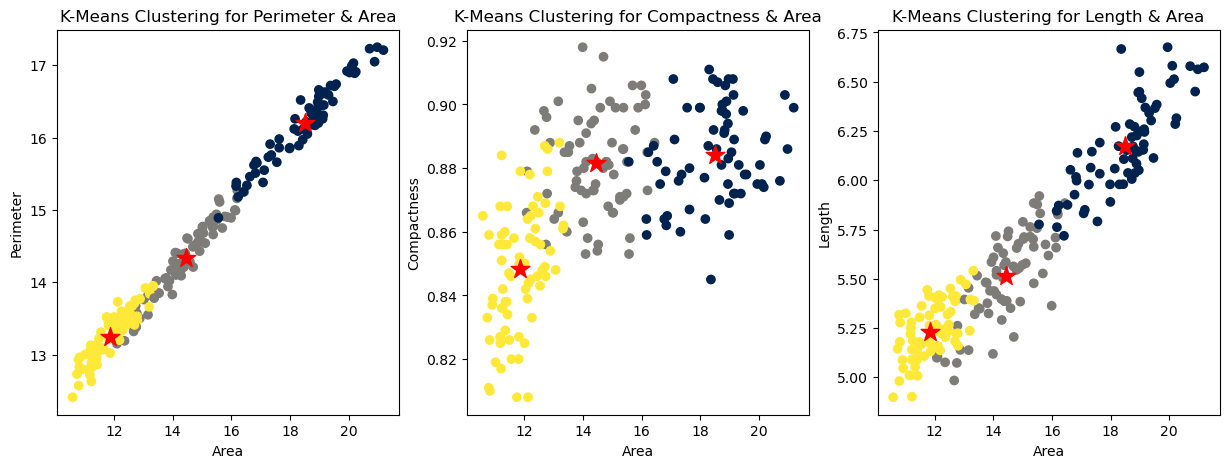

In [37]:
features = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length']

# optimal K selected from Elbow method
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=100) #random state kept same throughout analysis
seedsdata['cluster'] = kmeans.fit_predict(X_scaled)

# Show position of cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:")
print(cluster_centers_df)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns subplot

# 'K-means clustering for Perimeter & Area plot'
axs[0].scatter(seedsdata['area'], seedsdata['perimeter'], c=seedsdata['cluster'], cmap='cividis')
axs[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='*', s=200) #cluster center 
axs[0].set_title('K-Means Clustering for Perimeter & Area')
axs[0].set_xlabel('Area')
axs[0].set_ylabel('Perimeter')

# 'K-means clustering for Compactness & Area plot'
axs[1].scatter(seedsdata['area'], seedsdata['compactness'], c=seedsdata['cluster'], cmap='cividis')
axs[1].scatter(cluster_centers[:, 0], cluster_centers[:, 2], c='red', marker='*', s=200)
axs[1].set_title('K-Means Clustering for Compactness & Area')
axs[1].set_xlabel('Area')
axs[1].set_ylabel('Compactness')

# K-means clustering for Length & Area plot
axs[2].scatter(seedsdata['area'], seedsdata['length'], c=seedsdata['cluster'], cmap='cividis')
axs[2].scatter(cluster_centers[:, 0], cluster_centers[:, 3], c='red', marker='*', s=200)
axs[2].set_title('K-Means Clustering for Length & Area')
axs[2].set_xlabel('Area')
axs[2].set_ylabel('Length')


The cluster centers serve as a summary of the characteristics of the seeds within each identified cluster. In this specific K-means clustering with three clusters, the cluster centers represent the mean values for each feature in the original scale.

#### 2.4.3 K-Means Analysis - Principal Component Analysis (PCA)

We employ various strategies to enhance the visual representation of clusters, with Principal Component Analysis (PCA) [2] emerging as a powerful tool for reducing dimensionality and facilitating a more insightful visualization, particularly in a 2D feature space..

PCA enables the transformation of cluster centers from the original feature space to a reduced-dimensional representation. Focusing on the first two principal components, specifically the Perimeter and Area, allows us to create a visual comparison between the original feature space and the transformed representation. 

This not only simplifies the visualisation process but also provides a more intuitive understanding of the inherent patterns and structures within the clusters. 

/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


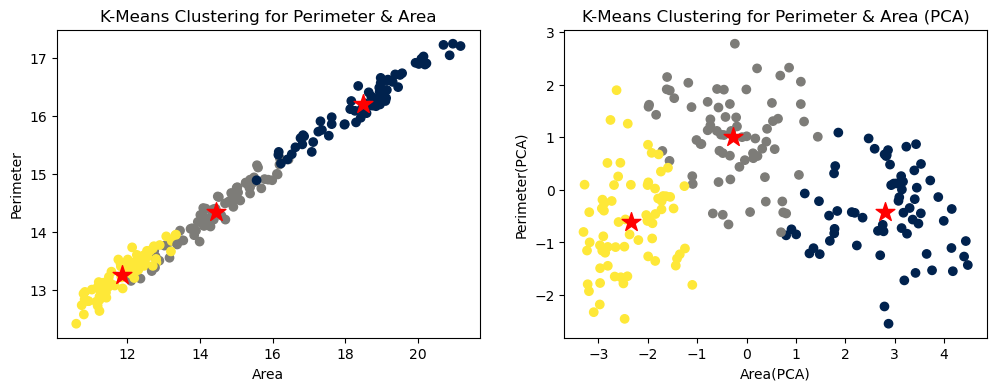

In [38]:
from sklearn.decomposition import PCA #library imported for PCA purposes

# Dimensionality reduction
pca = PCA(n_components=3) 
X_pca = pca.fit_transform(X_scaled)

# KMean for modified features
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=100)
seedsdata['cluster'] = kmeans.fit_predict(X_scaled)

# cluster center transformation for reduced feature space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_) 

fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns subplot

# Plot to compare the 2 feature spaces
axs[0].scatter(seedsdata['area'], seedsdata['perimeter'], c=seedsdata['cluster'], cmap='cividis')
axs[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='*', s=200)
axs[0].set_title('K-Means Clustering for Perimeter & Area')
axs[0].set_xlabel('Area')
axs[0].set_ylabel('Perimeter')

axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=seedsdata['cluster'], cmap='cividis')
axs[1].scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='*', s=200)
axs[1].set_title('K-Means Clustering for Perimeter & Area (PCA)')
axs[1].set_xlabel('Area(PCA)')
axs[1].set_ylabel('Perimeter(PCA)')
plt.show() 

The application of PCA offers a clearer and more interpretable representation in a 2D space. This strategic adjustment enhances the overall perceptibility and analytical value of the cluster visualisation process.

#### 2.4.4 K-Means Analysis - Silhouette Score Analysis

To ensure the robustness of our K-Means clustering analysis and substantiate the quality of clusters across different k values, we implemented the Silhouette Score analysis method. 

The Silhouette Score represents the mean silhouette across all instances within the dataset. It serves as an indicator of cohesion and separation between clusters, quantifying how well-defined and distinct clusters are. This is achieved by assessing the average distance of each data point to its own cluster compared to the nearest neighboring cluster. A higher Silhouette Score suggests more clearly defined and appropriately separated clusters.

By employing the Silhouette Score analysis method, we aim to enhance our understanding of clustering efficacy beyond the inertia-based Elbow method. This additional layer of evaluation provides a nuanced perspective on the appropriateness of our chosen k values, contributing to a more comprehensive and well-informed decision-making process in determining the optimal number of clusters for our selected dataset.

/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

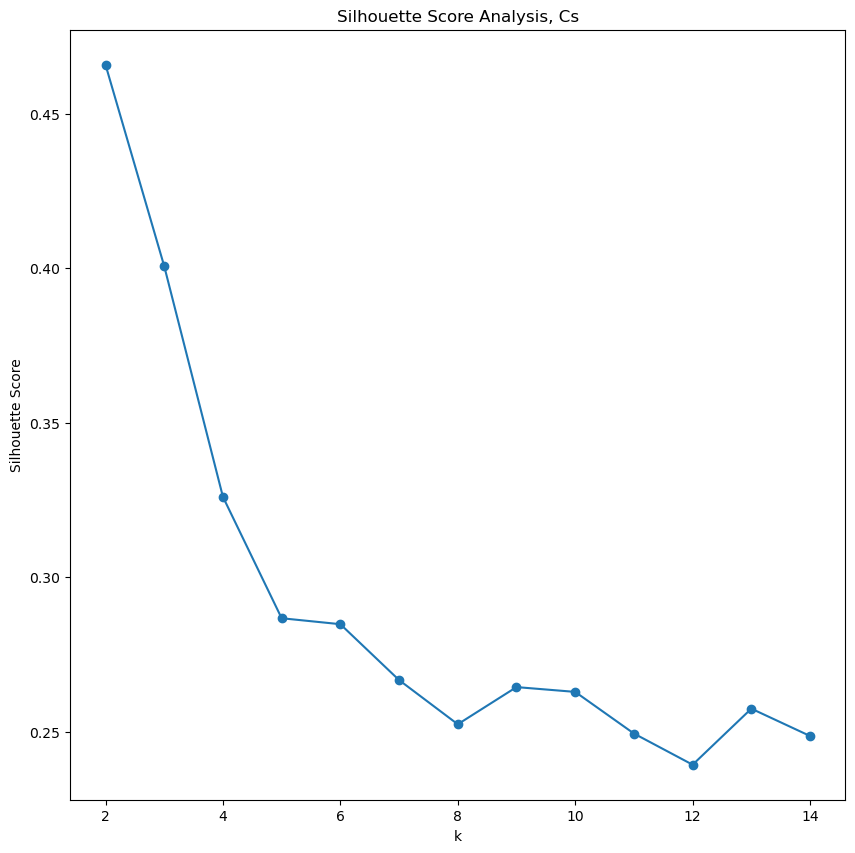

Highest Silhouette Score: 0.46580082738022255 at K = 2


In [39]:
from sklearn.metrics import silhouette_score  # importing to calculate silhouette_score

silhouette_scores = [] #create list 

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=100)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# identifying max silhouette score from the plot 
plt.figure(figsize=(10, 10))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis, Cs')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()
max_silhouette_score = max(silhouette_scores)
optimal_k = silhouette_scores.index(max_silhouette_score) + 2  # starting with 2 clusters
print(f"Highest Silhouette Score: {max_silhouette_score} at K = {optimal_k}") 


From our Silhouette Score analysis, we observe the highest Silhouette score is approximately 0.466, corresponding to a K-value of 2. This score indicates the presence of well-defined clusters in our data, demonstrating a substantial degree of separation between them. The elevated Silhouette Score at K=2 aligns with the insights from our earlier observations using the Elbow Method.

The concurrence between these two independent methods reinforces the reliability of our findings. The K=2 configuration emerges as a compelling choice not only based on inertia reduction but also with respect to the Silhouette Score, affirming the discernible separation and cohesion within these identified clusters. 


#### 2.4.5 K-Means Analysis - Davies Bouldin Score 

We incorporate the Davies–Bouldin Index (DBI), a metric that assesses the quality of clustering by considering both the separation and compactness of clusters. This additional evaluation aims to provide a holistic understanding of the clustering quality, taking into account not only the distinctiveness of the clusters but also their cohesion. 

The Davies–Bouldin Index proves to be a valuable complement to our analysis, offering a comprehensive perspective on the effectiveness of the identified clusters for the seed measurements.

In [40]:
from sklearn.metrics import davies_bouldin_score #import to calculate DBI index

# Davies–Bouldin Index score calculation
predicted_labels = seedsdata['cluster'] # initialise predicted labels from K-means clustering
db_index = davies_bouldin_score(X_scaled, predicted_labels)
print(f"Davies–Bouldin Index: {db_index}")

Davies–Bouldin Index: 0.9277371170291545


We obtain a DBI value of approximately 0.93. This index spans from 0 to positive infinity, where a lower value is indicative of superior clustering, with 0 being the ideal scenario. Conversely, higher DBI values imply suboptimal clustering, reflecting more dispersed and less compact clusters.

The specific DBI value of approximately 0.93 in our context suggests that, on average, the clusters exhibit a moderate level of separation and compactness, providing valuable insights for further optimisation and exploration in the realm of clustering methods.

To enhance clustering quality, one may explore different values of K in K-means clustering or consider alternative clustering algorithms. However, it's essential to note that the assessment of clustering metrics should be complemented with domain knowledge and an understanding of the overarching goals of the analysis.

#### 2.4.6 K-Means Analysis - Pair plots

We generate a matrix of scatterplots that visually depict the relationships between pairs of features. Each data point is colour-coded based on its cluster assignment, offering a visual exploration of feature relationships within the identified clusters. This approach provides valuable insights into how features interact within specific clusters, facilitating a more nuanced understanding of the inherent patterns and structures within the dataset.

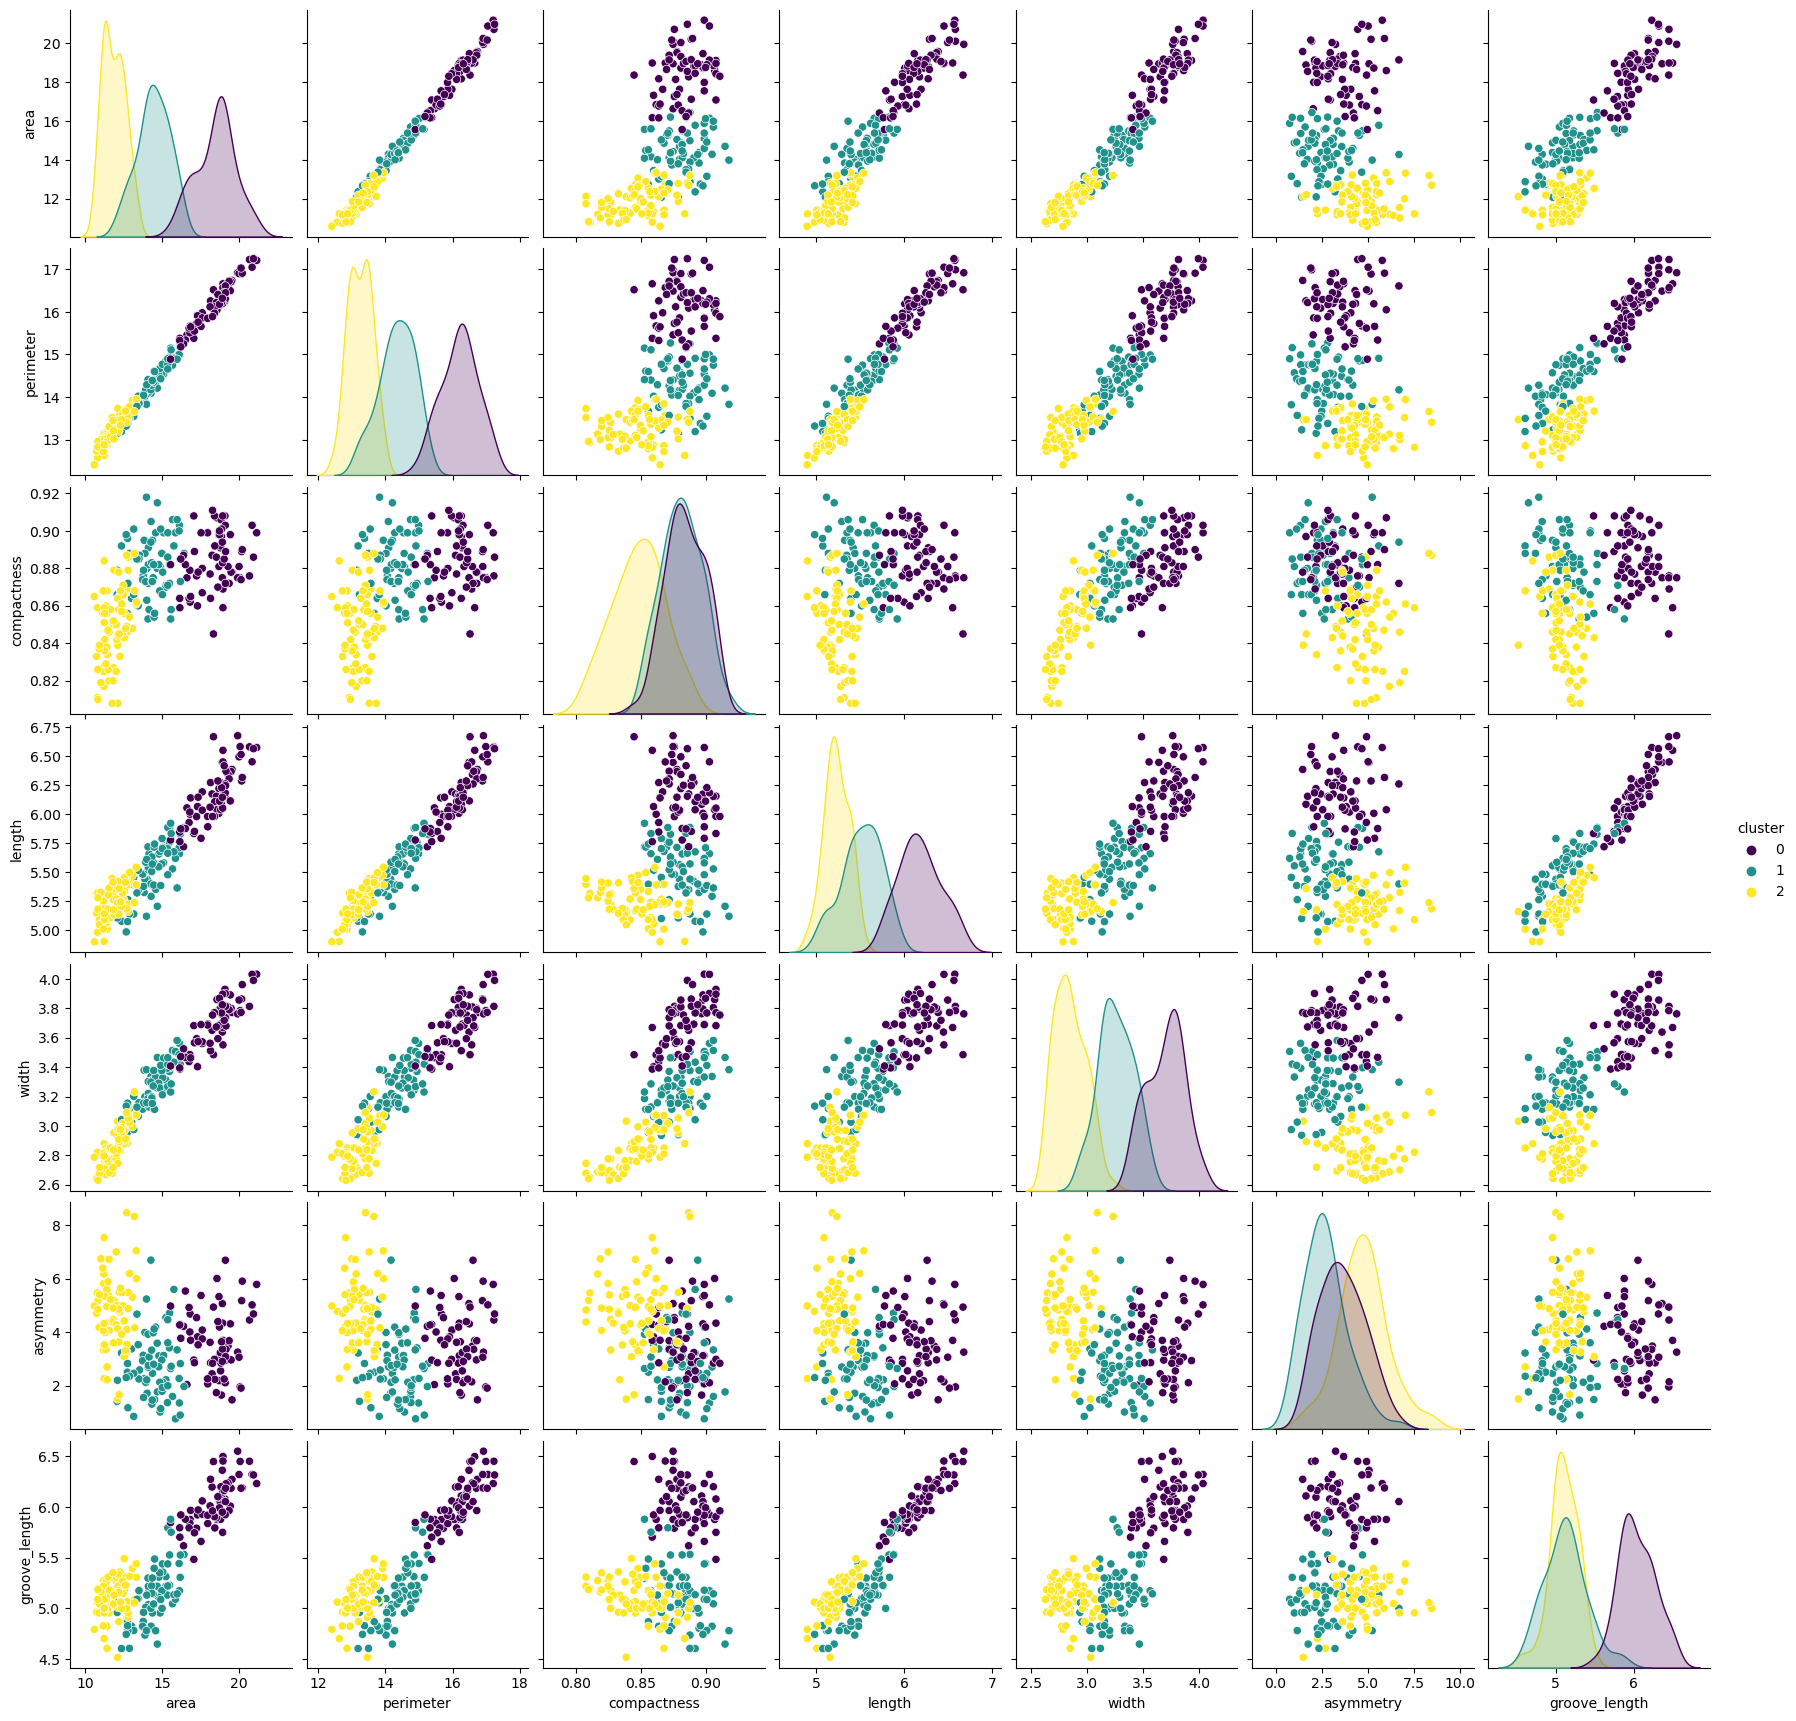

In [41]:
sns.pairplot(seedsdata, hue='cluster', palette='viridis')
plt.show()

From our graphs, the clusters exhibit distinct patterns in the given features, suggesting natural groupings within the seed dataset. The practical significance lies in these clusters potentially representing different types or classes of seeds, offering valuable insights for further analysis or decision-making. 

Additionally, the exploration of alternative clustering techniques or parameter fine-tuning for continuous refinement and enhanced clustering performance may also be considered.

#### 2.4.7 K-Means Analysis - Box plots

We construct a series of box plots for each feature, organised by cluster grouping. In these plots, the boxes encapsulate the interquartile range, providing a visual synopsis of the distribution of each feature within individual clusters. 


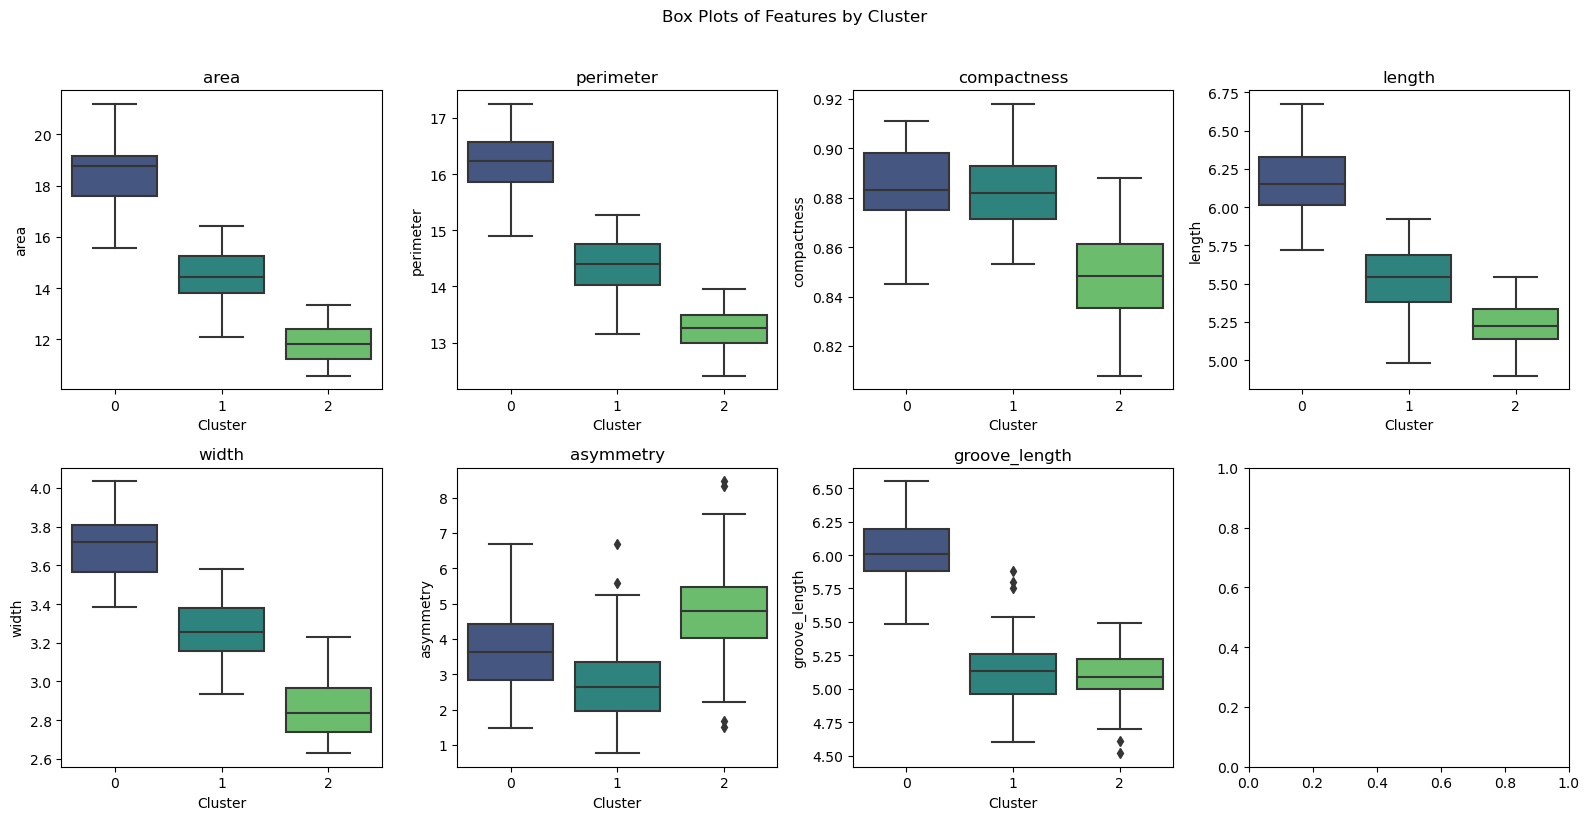

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Box Plots of Features by Cluster', y=1.02)

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.boxplot(x='cluster', y=feature, data=seedsdata, palette='viridis', ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

This visualisation is particularly useful for identifying patterns, variations, and potential outliers in different features within each cluster.

This graphical representation also offers an intuitive way to compare and contrast feature variations among clusters, enhancing our comprehension of the distinct characteristics associated with each identified cluster in the dataset.

#### 2.4.8 K-Means Analysis - 3D plot 

We construct a 3D scatter plot to visually elucidate the relationships between three selected features. Data points are colour-coded according to their respective cluster assignments, providing a dynamic representation of feature relationships within clusters. 


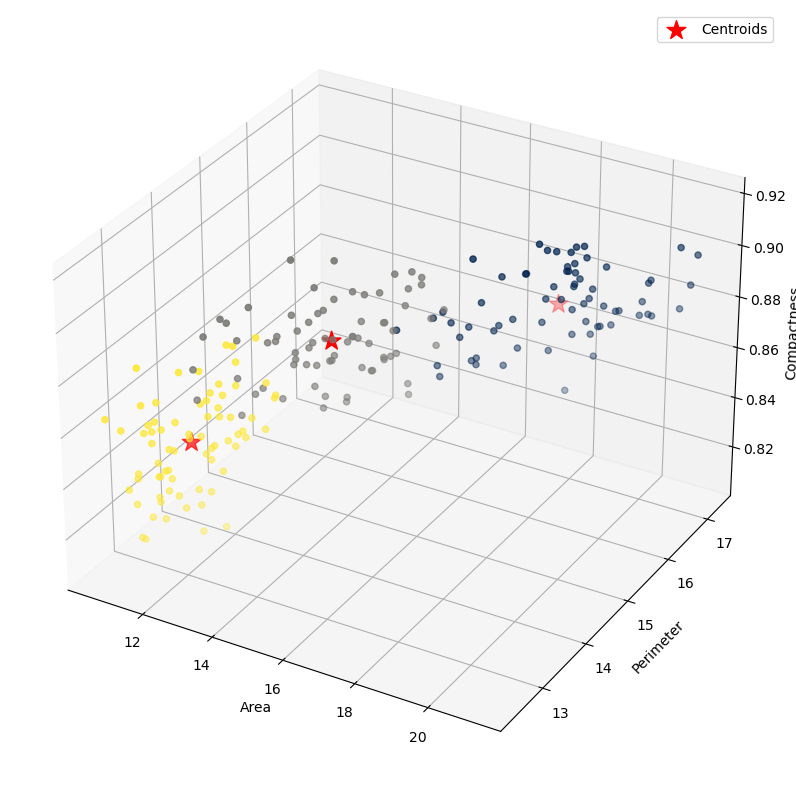

In [43]:
from mpl_toolkits.mplot3d import Axes3D #import library for 3D plot

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(seedsdata['area'], seedsdata['perimeter'], seedsdata['compactness'], c=seedsdata['cluster'], cmap='cividis')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='*', s=200, label='Centroids')
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')
plt.legend()
plt.show()


Additionally, cluster centroids are emphasised in the plot, offering key reference points for additional context. This visualisation not only enhances the understanding of feature interactions within clusters but also provides a spatial perspective, allowing for a more immersive exploration of the dataset's inherent patterns.

#### 2.4.9 K-Means Analysis - Hopkins Statistics 

The Hopkins Statistic is a measure used to assess the spatial randomness of a dataset, gauging the likelihood that the data is generated by a uniform distribution. A value of 0.5 tends to indicate a uniform distribution with no discernible clusters.

The statistic is calculated by comparing the distances between randomly chosen and uniformly placed points and their nearest neighbors in the dataset. The formula for the Hopkins Statistic (usually denoted as 𝐻) takes into account parameters such as 𝑛 (the number of randomly chosen points), 𝑦𝑖 (the distance of the 𝑖-th point from its nearest neighbor in the dataset), and 𝑥𝑖 (the distance of the 𝑖-th point from its nearest neighbour in a random uniform set of points).

In essence, the Hopkins Statistic provides a quantitative measure of the tendency of points in the dataset to form clusters or exhibit spatial randomness. A higher value suggests a more uniform distribution, while a lower value indicates a higher likelihood of clustering within the dataset.

In [44]:
from sklearn.neighbors import NearestNeighbors #import for hopkins statistics 

# function to calculate the hopkins statistics 
def hopkins_statistic(X, n_neighbors=10):
    """
    Calculate Hopkins statistic for K-Means clustering.
    
    Parameters:
    - X: Input data.
    - n_neighbors: Number of neighbors for calculating nearest neighbours.
    
    Returns:
    - Hopkins statistic value.
    """
    n = X.shape[0]  # No of samples

    # Random points to simulate uniform distribution
    rand_points = np.random.rand(n, X.shape[1])

    # Calculate distance between random points
    nn_rand = NearestNeighbors(n_neighbors=n_neighbors).fit(rand_points)
    d_rand, _ = nn_rand.kneighbors(rand_points)

    # Calculation distance between actual data points
    nn_data = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
    d_data, _ = nn_data.kneighbors(X)

    numerator = np.sum(d_data, axis=1)
    denominator = np.sum(d_rand, axis=1) + np.sum(d_data, axis=1)

    hopkins_stat = np.mean(numerator / denominator)

    return hopkins_stat

# Calculate the Hopkins statistic
hopkins_value = hopkins_statistic(X_scaled) #call function 
print(f"Hopkins Statistic: {hopkins_value}")

Hopkins Statistic: 0.6066504272354935


The calculated Hopkins Statistic for the dataset is approximately 0.6, suggesting a moderate tendency towards spatial randomness in the data. Although not perfectly uniform (as indicated by a value of 0.5), the dataset exhibits a degree of dispersion, indicating some clustering, but it is not highly pronounced.

### 2.5 Clustering Analysis - Gaussian Mixture Model 

Gaussian Mixture Models (GMM) present a powerful approach for representing datasets, especially in scenarios where observations may originate from a combination of one or a few underlying probability distributions. Unlike K-means, GMM relies more on the concept of probability distributions, making it a nuanced and flexible method for modeling complex data structures.

In contrast to K-means, which assumes hard assignments of data points to clusters, GMM allows for a probabilistic assignment of points to clusters. This is particularly beneficial in situations where clusters are in close proximity, and their influence areas may overlap. 

GMM, therefore, provides a more sophisticated and probabilistic framework, enabling the assessment of the likelihood of a particular assignment and capturing the uncertainty associated with data points lying on the borders of different clusters.

GMM extends on the ideas of K-means by introducing probabilistic considerations, offering a more realistic representation of datasets with intricate structures and enabling a richer understanding of the underlying patterns in the data. In this part of the analysis, we apply GMM to our dataset containing the seeds measurements. 

#### 2.5.1 Gaussian Mixture Model - Data Visualisation 

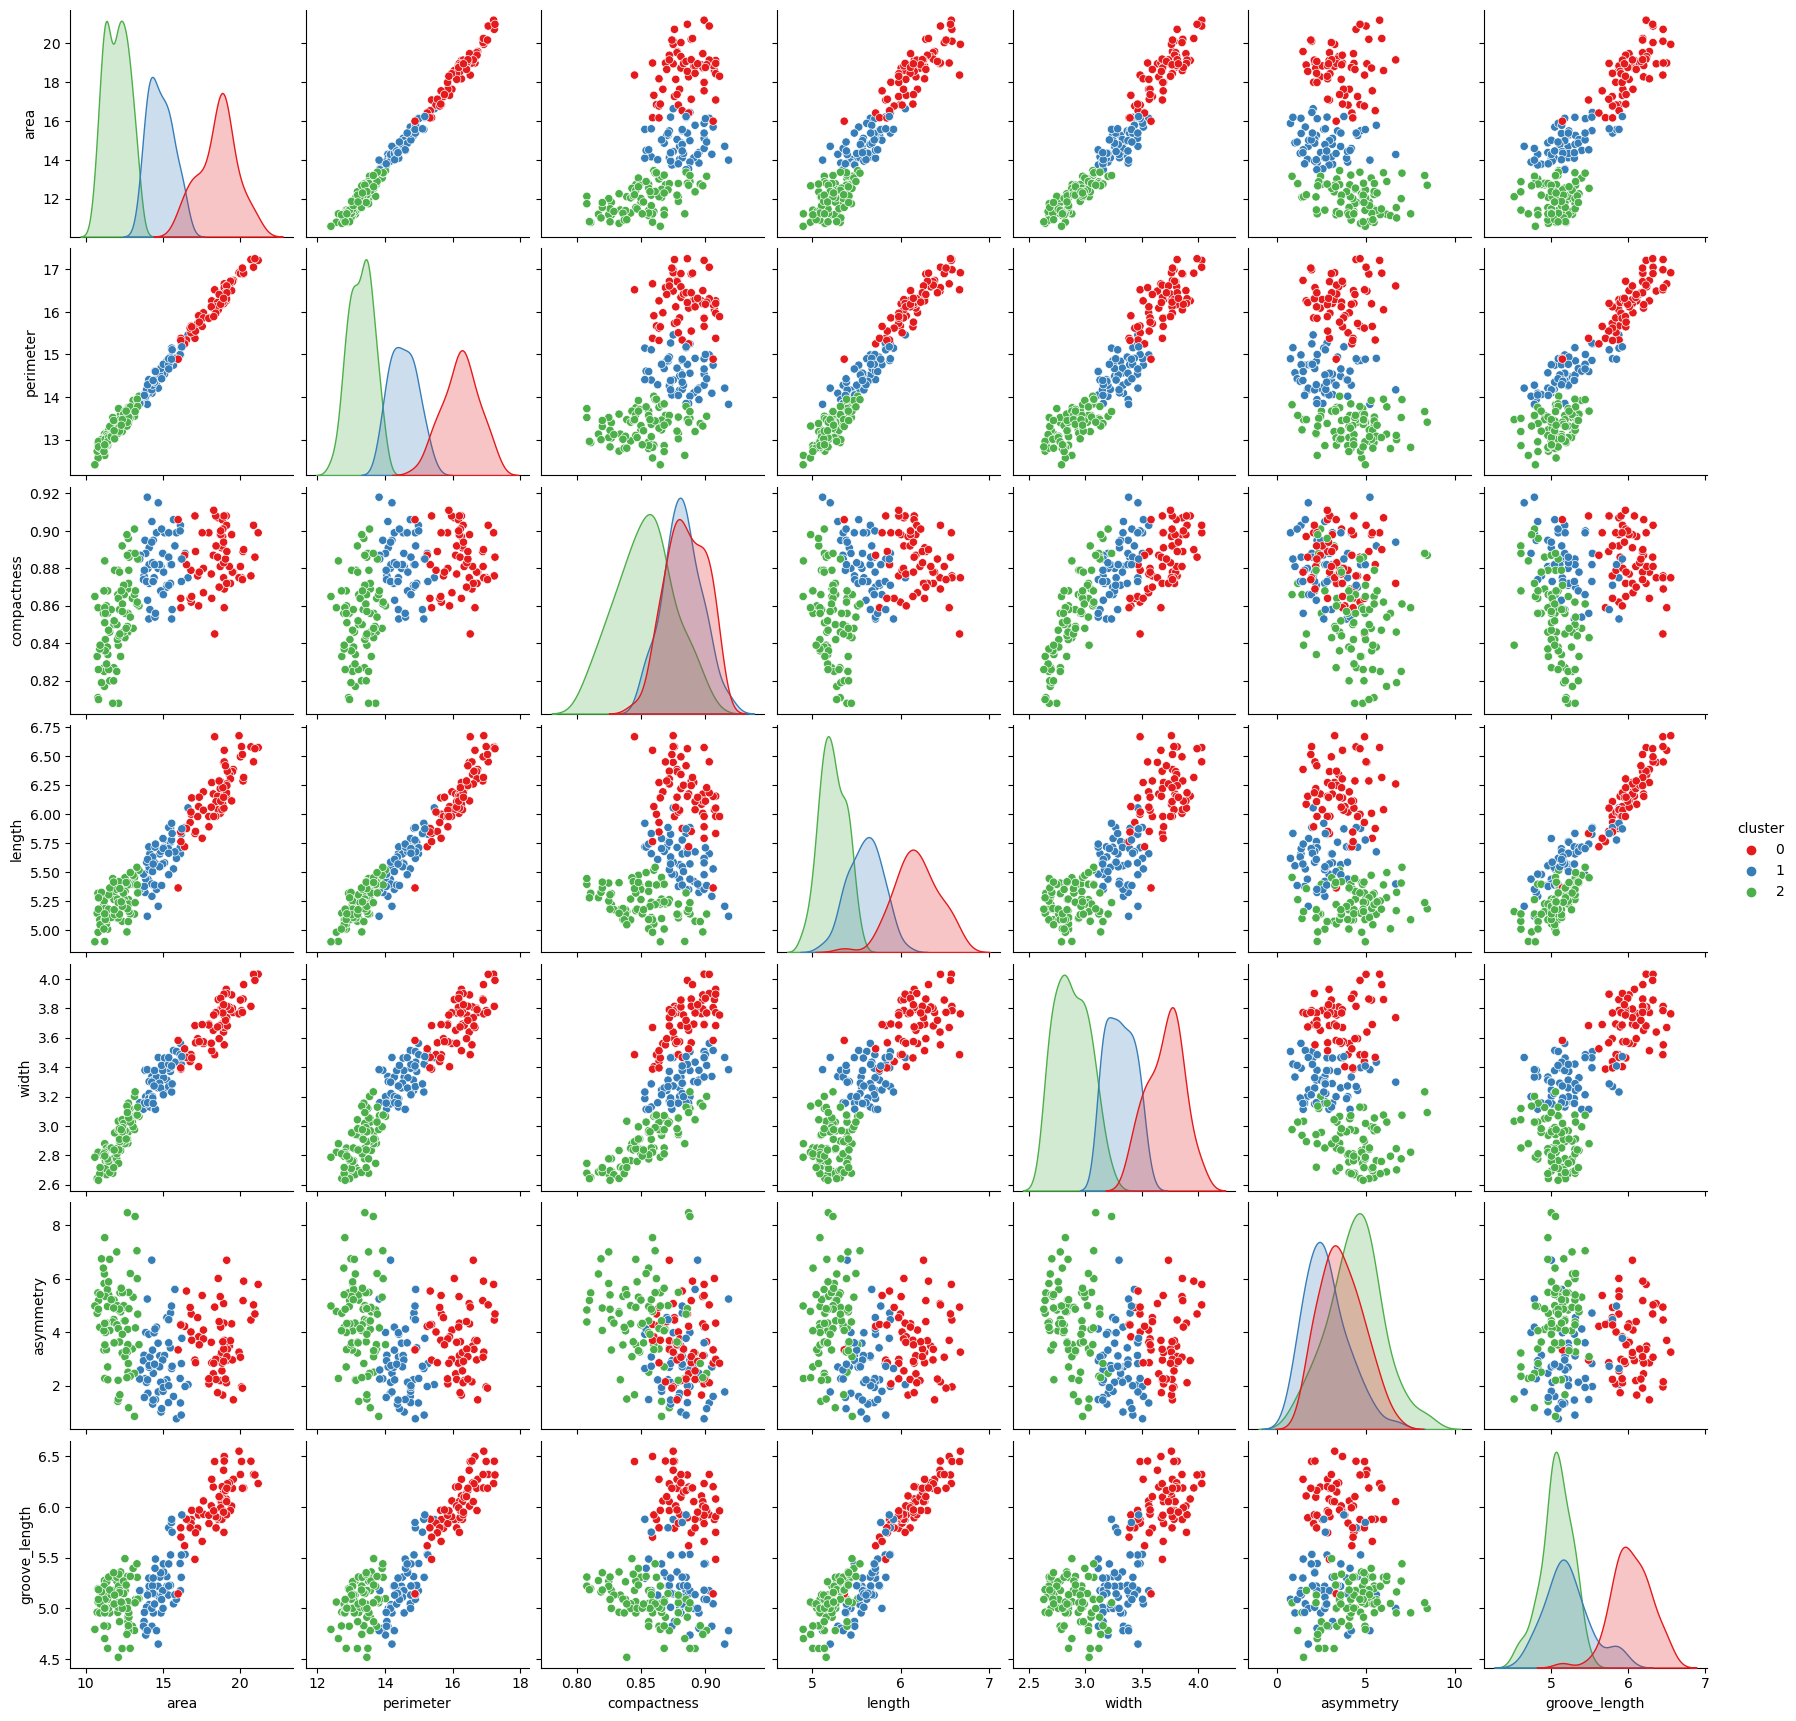

In [45]:
from sklearn.mixture import GaussianMixture #import for Gaussian Mixture Model analysis

features = seedsdata[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length']]

# standardise features for GMM 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
n_clusters = 3 

# GMM fit
gmm = GaussianMixture(n_components=n_clusters, random_state=100)
seedsdata['cluster'] = gmm.fit_predict(features_standardized)
sns.pairplot(seedsdata, hue='cluster', palette='Set1')
plt.show()

Unlike other clustering algorithms, GMMs assigns a probability to each data point, indicating the likelihood that the point was generated by a particular component (or cluster) of the mixture.

In GMMs, each cluster is represented by a Gaussian distribution, and data points are modeled as a combination of these distributions. During the fitting process, GMMs estimate the parameters of these Gaussians, including their means, covariances, and weights. The resulting model allows for a probabilistic assignment of each data point to the different components, reflecting the uncertainty or confidence.

This probabilistic nature makes GMMs particularly useful when dealing with complex data structures where points may belong to multiple clusters simultaneously. 

/var/folders/gh/gl844sg14c19zxsbgbxvzl380000gn/T/ipykernel_79709/3091234724.py:30: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color='black', alpha=0.2)


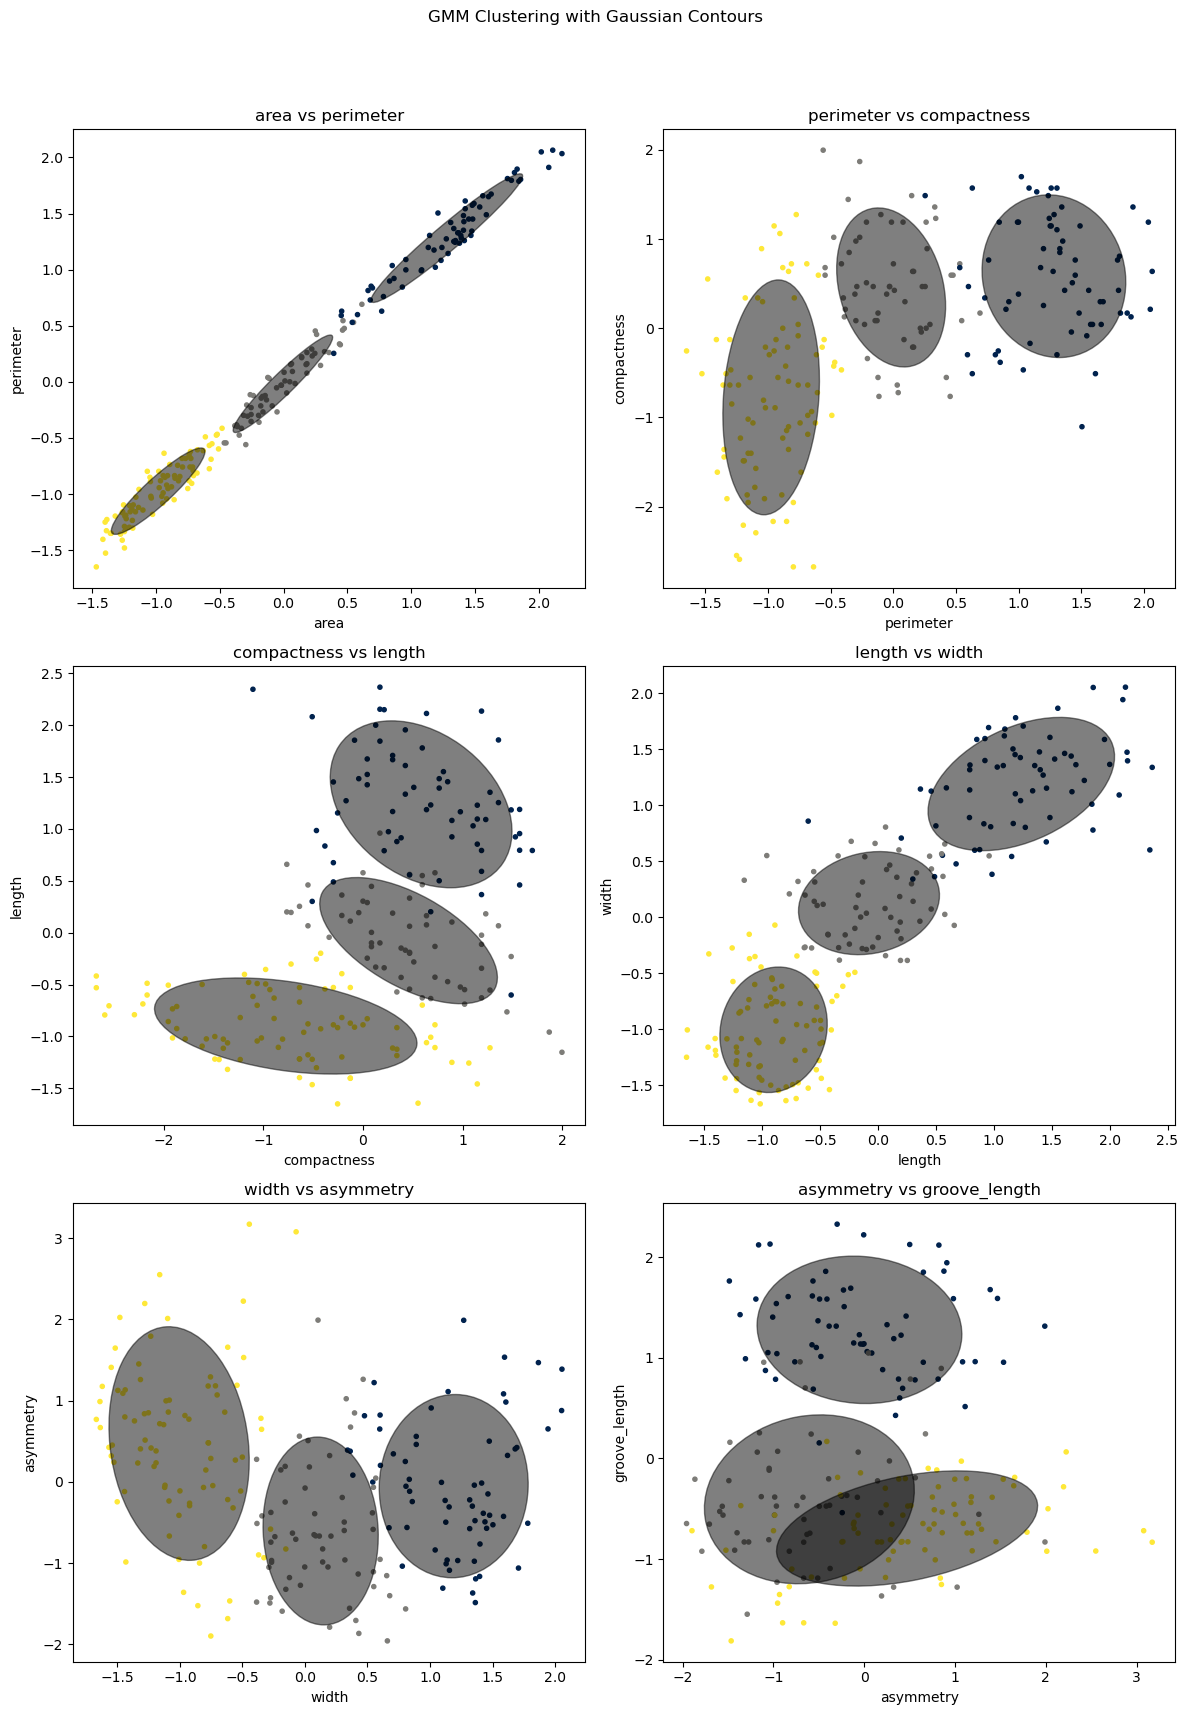

In [48]:
features = seedsdata[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length']]

gmm = GaussianMixture(n_components=3, random_state=100)
labels = gmm.fit_predict(features_standardized)

fig, axs = plt.subplots(3, 2, figsize=(12, 18))
fig.suptitle('GMM Clustering with Gaussian Contours')

# Gaussian contours for each pair of features
for i, ax in enumerate(axs.flatten()):
    feature1_index = i
    feature2_index = (i + 1) % len(features.columns)

    ax.scatter(features_standardized[:, feature1_index], features_standardized[:, feature2_index], c=labels, cmap='cividis', marker='.')
    ax.set_title(f'{features.columns[feature1_index]} vs {features.columns[feature2_index]}')
    ax.set_xlabel(features.columns[feature1_index])
    ax.set_ylabel(features.columns[feature2_index])

    
    for j in range(len(gmm.means_)):
        mean = [gmm.means_[j][feature1_index], gmm.means_[j][feature2_index]]
        cov = np.array([[gmm.covariances_[j][feature1_index, feature1_index], gmm.covariances_[j][feature1_index, feature2_index]],
                        [gmm.covariances_[j][feature2_index, feature1_index], gmm.covariances_[j][feature2_index, feature2_index]]])

        v, w = np.linalg.eigh(cov)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi
        ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color='black', alpha=0.2)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_patch(ell)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In the above visualisation, the scatter plots depict the distribution of data points are  in two-dimensional spaces defined by pairs of selected features. The colour of the points indicates the cluster assignment by the GMM model, while the overlaid ellipses represent the Gaussian contours of each cluster. This provides insights into the shape and orientation of the clusters in the feature space.

The Gaussian Mixture Model (GMM) contours in the visualisation above representat the probability distribution of data points within each cluster. Each cluster is modeled as a multivariate Gaussian distribution, characterised by its mean, covariance matrix, and weight.

We can inspect the probabilistic cluster assignments for each data point in the dataset based on a fitted Gaussian Mixture Model (GMM) using the following method. Here, 'probs' holds the probabilistic cluster assignments for each data point based on the GMM, allowing for a more nuanced understanding of the data point's association with each cluster.

In [49]:
# Inspect probabilistic cluster assignments
probs = gmm.predict_proba(features_standardized)
# Returns (n_samples, n_clusters) measuring the probability
# that any point belongs to the given cluster.
probs.shape

(210, 3)

#### 2.5.2 Gaussian Mixture Model - AIC/BIC 

Investigating the efficacy of Gaussian Mixture Models (GMMs) necessitates a comprehensive examination across a spectrum of component values, focusing on evaluating their performance through the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC). The following illustrative demonstration, utilizing the scikit-learn library, is presented for clarity and practical implementation.

This implementation offers a rigorous examination by systematically varying the number of components, providing a visual representation of their performance through the BIC & AIC metrics. Such meticulous analysis ensures a nuanced understanding of the model's behavior under diverse configurations, contributing to a robust and informed decision-making process in the application of Gaussian Mixture Models.

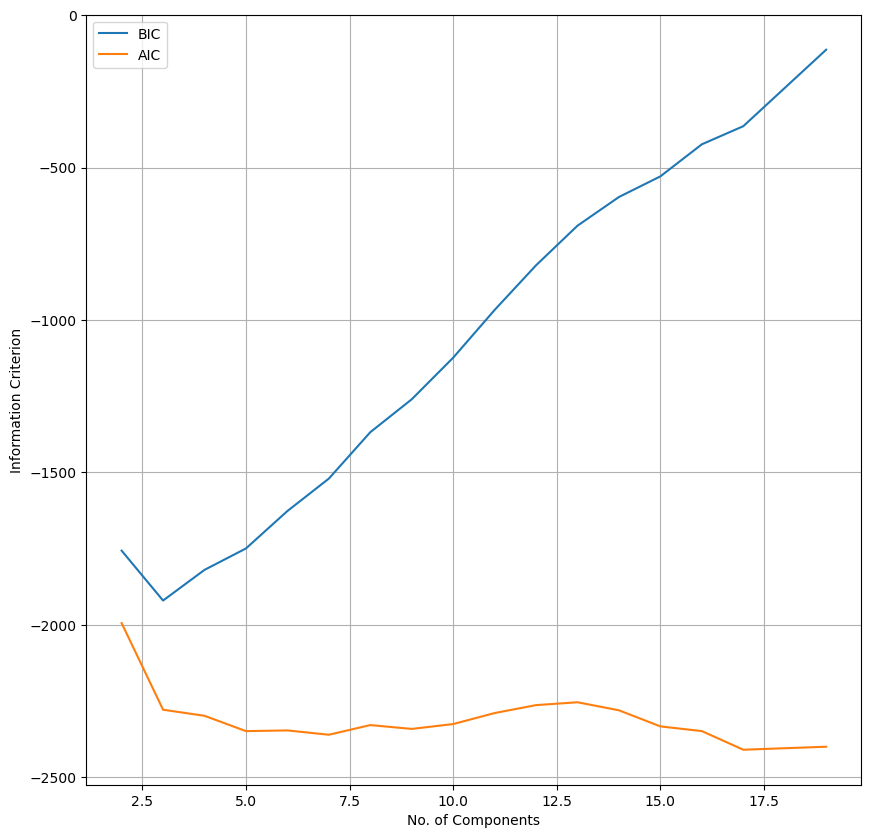

In [50]:
X = seedsdata[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length']]

n_components = range(2, 20) # Test over range of values

# Fit GMMs for each number of components
models = [GaussianMixture(n, covariance_type='full', random_state=100).fit(X) for n in n_components]

# Plot BIC & AIC
plt.figure(figsize=(10, 10))
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.xlabel('No. of Components')
plt.ylabel('Information Criterion')
plt.grid()
plt.legend()
plt.show()


For each candidate number of clusters, a distinct model is fitted, and the AIC and BIC are computed. These information criteria serve as metrics to evaluate the trade-off between goodness of fit and model complexity. Specifically, lower values of AIC or BIC indicate a model that provides a better balance, capturing the underlying patterns in the data while avoiding unnecessary complexity.

The rationale behind this methodology is to choose the number of clusters that minimises the AIC or BIC, thus identifying a model that is both accurate and parsimonious. Larger values of these criteria imply either a poor fit or an overly complex model, suggesting the presence of noise or unnecessary intricacies in the clustering.

The observed pattern in the Akaike Information Criterion (AIC), exhibiting a relatively flat profile across varying component values, suggests that the model's goodness of fit experiences marginal improvement with the addition of extra components. This could imply that the incremental gain in explanatory power does not justify the increased model complexity, indicating a potential optimal balance at the current number of components.

Conversely, the Bayesian Information Criterion (BIC), displaying a positive incline when the number of components is set to 3, may indicate a preference for a more complex model. The BIC penalises model complexity more rigorously than the AIC, and the upward trend suggests that, at 3 components, the model is benefiting from an improved fit that surpasses the penalty for increased complexity.

In summary, the AIC suggests diminishing returns in model improvement with additional components, hinting at a potential optimal model complexity. Meanwhile, the BIC favours a more intricate model at 3 components, acknowledging the trade-off between goodness of fit and model complexity. The combination of these metrics can aid in making an informed decision regarding the appropriate number of components in the Gaussian Mixture Model, ultimately with an aim to strike a balance between explanatory power and model parsimony.

### 2.6 Clustering Analysis - K-Means vs GMM

We compare the graphical representations of K-Means clustering and the Gaussian Mixture Model (GMM) to discern and evaluate their respective clustering performances. This comparative analysis involves visualising and scrutinising the spatial distribution and grouping patterns of data points elucidated by each algorithm. 

The goal is to derive insights into the efficacy of K-Means versus GMM in accurately partitioning the dataset and capturing inherent structures. Such a comparative assessment provides valuable perspectives to inform the selection of an appropriate clustering algorithm based on the observed performance characteristics.

/Users/vedjissurey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


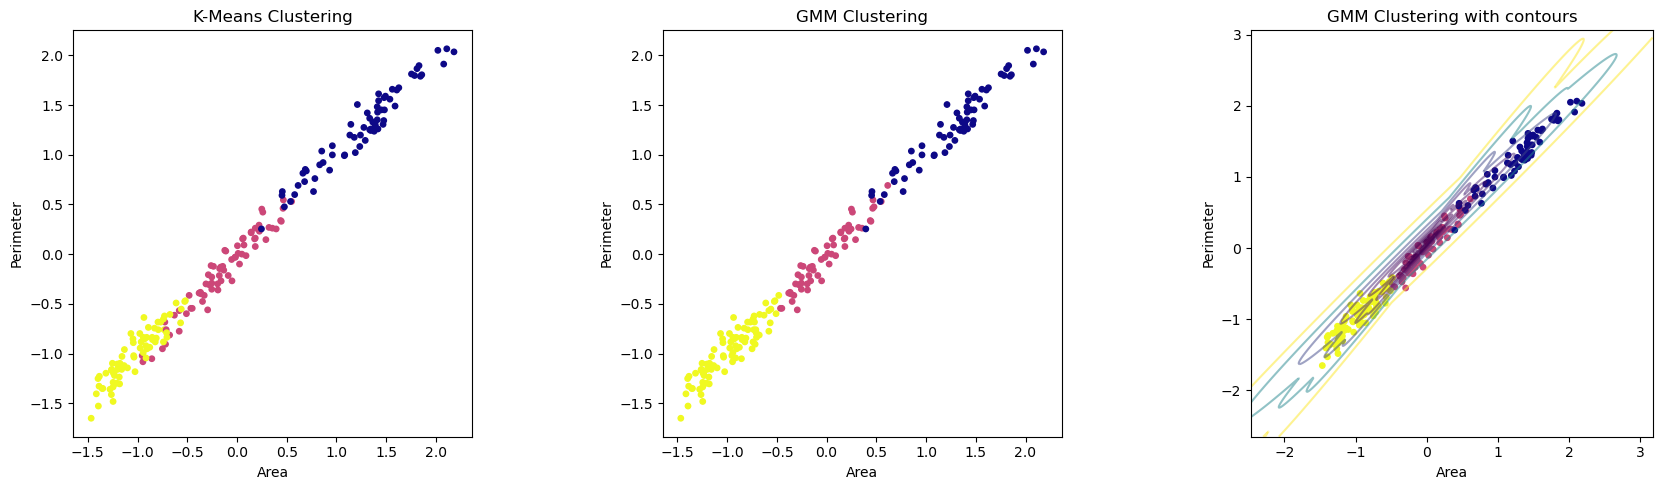

In [62]:
# K-Means

X_standardized = features_standardized
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans_labels = kmeans.fit_predict(X_standardized)

# GMM
gmm = GaussianMixture(n_components=3, random_state=100)
gmm_labels = gmm.fit_predict(X_standardized)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], s=15, c=kmeans_labels, cmap='plasma')
plt.title('K-Means Clustering')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.gca().set_aspect('equal')

plt.subplot(1, 3, 2)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], s=15, c=gmm_labels, cmap='plasma')
plt.title('GMM Clustering')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.gca().set_aspect('equal')

x_min, x_max = X_standardized[:, 0].min() - 1, X_standardized[:, 0].max() + 1
y_min, y_max = X_standardized[:, 1].min() - 1, X_standardized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

plt.subplot(1, 3, 3)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], s=15, c=gmm_labels, cmap='plasma')
plt.title('GMM Clustering with contours')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.gca().set_aspect('equal')
plt.contour(xx, yy, Z, levels=np.logspace(0, 3, 10), cmap='viridis', alpha=0.5)
plt.tight_layout()
plt.show()

In our exploration of the seed dataset, the K-Means analysis advocates for a division into two or three distinct clusters, substantiated by a Hopkins Statistic value of 0.6. Additionally, the Davies–Bouldin Index, measuring cluster compactness and separation, echoes this suggestion with a value of 0.93.

On the other hand, delving into the Gaussian Mixture Model (GMM) analysis, an intriguing prospect of three clusters also emerges. This proposition finds support in the AIC and BIC curves, classic indicators aligning with the selection of K=3.

As we traverse the landscape of cluster shapes, a subtle convergence unfolds. The disparities between K-Means and GMM clusters diminish, especially in the latter stages of our analysis. Visual cues from centroid plots substantiate this convergence, portraying consistent patterns across both models.

Yet, the GMM introduces an additional layer of sophistication through Gaussian contours. These contours unravel the probabilistic nature of data distribution, a departure from the deterministic assignment of K-Means clustering. It is within these contours that GMM shows its ability to accommodate intricate data structures and potential overlaps that may elude the rigidity of K-Means.

K-Means, with its penchant for simplicity and speed, adheres to the assumption of spherical clusters and uniform sizes. In contrast, GMM, with its Gaussian distributions, sidesteps these assumptions, offering a more nuanced perspective on clusters that might adopt irregular shapes or varying dimensions.

Ultimately, our comparative journey between K-Means and GMM suggests a convergence in clustering outcomes, though nuanced differences exist. The selection between these models hinges on the inherent characteristics of the data and the interpretative lens one wishes to apply. K-Means, with its clarity and swiftness, contrasts with GMM's flexibility in capturing intricate relationships. The former simplifies; the latter accommodates complexity. 

The identified clusters may represent different types or classes of seeds, providing valuable insights for further analysis or decision-making. This could be related to information on the countries where the seeds originate from or the climate they were cultivated in. 

### 2.7 Classification - Logistic Regression Analysis 

#### 2.7.1 Understanding the Data 

In the preceding section, we conducted a comprehensive examination of the initial dataset assigned for this project, namely 'seeds.csv'. Our analysis delved into unsupervised machine learning tasks, with a primary emphasis on K-Means and Gaussian Mixture Models clustering methodologies, revealing underlying patterns in the dataset.

To enrich our analysis, we acquired a copy of the original source dataset from http://archive.ics.uci.edu/dataset/236/seeds, named 'seeds_dataset.txt',  and integrated it into our notebook. Subsequently, we used the '.head' feature to capture a snapshot of the loaded datafile, allowing us to gain an overview of its contents.

In [54]:
# datafile "seeds_dataset.txt" addressed from the same space as our Notebook.

#loading the original seeds data used

seedsdata2 = pd.read_csv('./data_assignment/seeds_dataset.txt',sep='\t', header=None, error_bad_lines=False) 
seedsdata2.head() #snapshot of first 5 rows

/var/folders/gh/gl844sg14c19zxsbgbxvzl380000gn/T/ipykernel_79709/548939636.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  seedsdata2 = pd.read_csv('./data_assignment/seeds_dataset.txt',sep='\t', header=None, error_bad_lines=False)
Skipping line 8: expected 8 fields, saw 10
Skipping line 36: expected 8 fields, saw 10
Skipping line 61: expected 8 fields, saw 9
Skipping line 69: expected 8 fields, saw 9
Skipping line 107: expected 8 fields, saw 9
Skipping line 136: expected 8 fields, saw 9
Skipping line 170: expected 8 fields, saw 9
Skipping line 171: expected 8 fields, saw 9
Skipping line 173: expected 8 fields, saw 9
Skipping line 202: expected 8 fields, saw 9
Skipping line 204: expected 8 fields, saw 9



0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1

In the preceding section, we observed that the structure of 'seeds_dataset.txt' closely resembles that of 'seeds.csv,' differing only in its format, which is '.txt'.

Both datasets share identical columns, encompassing features such as area, perimeter, compactness, length of kernel, width of kernel, asymmetry coefficient, and length of kernel groove. An additional column on the far right contains values denoting the seed variety, indicated as 1, 2, or 3. The existence of these labeled varieties might have some connection to the clustering behavior noted earlier.

In the realm of clustering methodologies like K-Means and GMM, the primary goal is to group data points without predefined labels based on similarities. Conversely, supervised machine learning tasks demand labeled data for training, where the seed variety now acts as a label. This connection between the identified labels and previous K-Means and GMM clustering behaviour for K=3 hints at a potential relationship.

Therefore, the dataset lends itself to exploration through a supervised machine learning task. Supervised machine learning operates in artificial intelligence and data science, involving training an algorithm on a labeled dataset. This learning paradigm enables the model to discern patterns within the training data, creating a mapping from input data to corresponding output labels. The training process involves presenting the algorithm with input-output pairs, where correct output labels are provided, and the model can refine its parameters iteratively to minimize the disparity between predicted and actual outcomes.

For this task, we opt for logistic regression as our chosen method. Logistic regression introduces a probabilistic interpretation of predictions. Unlike unsupervised ML algorithms such as K-Means and GMM clustering, logistic regression is a supervised learning algorithm tailored for classification tasks. Its primary focus is predicting class labels rather than clustering data points, making it a valuable tool for tasks where clear classification boundaries are sought.

Despite its name, logistic regression is a statistical technique designed for binary classification tasks. The goal is to forecast the probability of an observation falling into one of two classes. The model uses the logistic function, also known as the sigmoid function, to convert a linear combination of input features into a probability score ranging from 0 to 1.

Logistic regression is chosen over other classification methods because of its interpretable coefficients. These coefficients provide clear insights into the impact of each feature on the log-odds of the predicted outcome. This interpretability proves valuable when seeking to understand the relationships between predictors and the response variable.

In [55]:
#data cleansing 

seedsdata2.dropna() 

0      1       2      3      4      5      6  7
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
..     ...    ...     ...    ...    ...    ...    ... ..
194  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
195  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
196  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
197  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
198  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[199 rows x 8 columns]

In [56]:
#cleaned data 

seedsdata2 

0      1       2      3      4      5      6  7
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
..     ...    ...     ...    ...    ...    ...    ... ..
194  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
195  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
196  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
197  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
198  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[199 rows x 8 columns]

After cleaning our data, we proceed to prepare 'seedsdata2', for logistic regression analysis. We first separate features and labels, where the last column represents labels, and features encompass all columns except the last one. The dataset is then split into training and testing sets using 'train_test_split',a crucial step for assessing the model's performance on unseen data.

As seen earlier, we apply StandardScaler to standardise the features, ensuring all comparable scales. This standardisation is particularly important for logistic regression and other distance-based algorithms.

A logistic regression classifier is instanstiated using 'LogisticRegression'tailored for binary classification problems. The model is trained on the standardized training data (X_train_scaled), and predictions are made on the standardized test data (X_test_scaled).

The logistic regression model's performance is evaluated using metrics such as accuracy, confusion matrix, and classification report. Accuracy Score measures overall correctness, the Confusion Matrix provides insight into true positives, true negatives, false positives, and false negatives while the Classification Report presents precision, recall, and F1-score for each class.

In [57]:
#import libraries for Logistic regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = seedsdata2.iloc[:, :-1]  # Features (all columns except last one)
y = seedsdata2.iloc[:, -1]   # Labels (last column)

# Split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating Logistic Regression classifier
clf = LogisticRegression(random_state=100)
clf.fit(X_train_scaled, y_train) # Training classifier on training data
y_pred = clf.predict(X_test_scaled) # Make predictions on the test data

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Evaluation metrics
print('\nClassification Report:')
print(classification_rep)
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.71      0.83         7
           2       0.95      1.00      0.97        18
           3       0.94      1.00      0.97        15

    accuracy                           0.95        40
   macro avg       0.96      0.90      0.92        40
weighted avg       0.95      0.95      0.95        40

Accuracy: 0.95

Confusion Matrix:
[[ 5  1  1]
 [ 0 18  0]
 [ 0  0 15]]


In the task of classifying seed types using a Logistic Regression model, we have achieved an accuracy of 95%. This metric reflects the proportion of correctly predicted instances out of the total instances in the test set, showcasing the model's effectiveness in discerning seed types.

The logistic regression model demonstrated an overall accuracy of 95%, accurately predicting class labels for a significant portion of the test dataset.

These metrics suggest that the model performs well overall, particularly for Class 2, but there is room for improvement in distinguishing between Classes 1 and 3. The macro average metrics indicate a balanced performance across classes. Further considerations should be based on specific objectives and application requirements.

#### 2.7.2 Logistic Regression - Confusion Matrix Visualisation 

We generate a qualitative visualisation of the confusion matrix and provide additional comments on the performance of our classification model.

The heatmap visualises the true positive, true negative, false positive, and false negative predictions for each class. Numerical values of the confusion matrix are annotated on the heatmap. The x-axis and y-axis depict predicted and true labels, respectively. The color intensity reflects the magnitude of each value in the confusion matrix.

We present an assessment of the model's overall accuracy on the test set, quantified as a percentage. We underscore the significance of precision, recall, and F1-score metrics in evaluating performance across different classes. Noteworthy is the exceptional performance of Class 2 (Seed type 2), achieving perfect precision, recall, and F1-score.

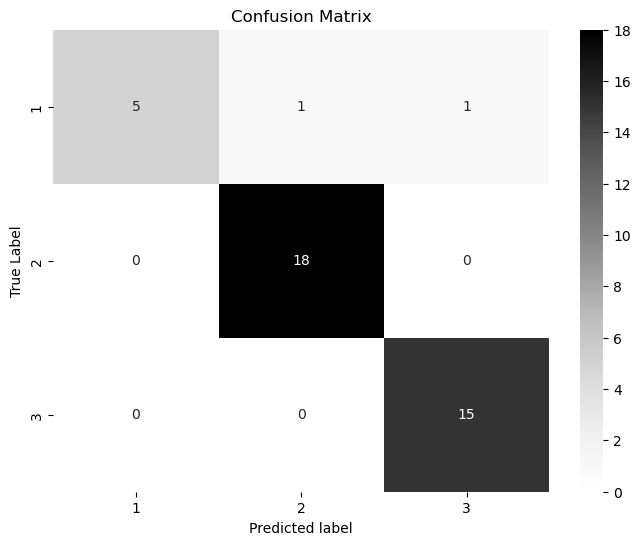

In [58]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.show()


Class 2 demonstrated exceptional performance with perfect precision, recall, and F1-score. This indicates that the model accurately identified all instances of Seed type 2, making no false positive or false negative predictions for this class.

In contrast, Class 1 shows lower precision and recall compared to the other classes. This suggests that the model may face challenges in correctly identifying instances of Seed type 1, resulting in a higher number of false positives or false negatives for this class.

In summary, although the overall accuracy is relatively high, a closer look at individual class metrics reveals variations in performance. The outstanding performance for Class 2 contrasts with the challenges the model faces in accurately predicting instances of Class 1. Further investigation and potential model refinement may be necessary to address these specific challenges and enhance overall classification performance.

#### 2.7.3  Logistic Regression - Sigmoid Function 

We visually illustrate the sigmoid or logistic function, commonly employed in logistic regression and binary classification models. The S-shaped curve smoothly transitions between 0 and 1, making it ideal for representing probabilities in binary decision contexts. 

Utilizing the logistic function formula, we generate a range of input values and compute corresponding output values. We plot the logistic function, where the x-axis denotes input values, and the y-axis represents output values, showcasing the characteristic S-shaped curve. 

We include a horizontal dashed line at 0.5, representing the decision boundary or threshold of the logistic function. This threshold is frequently used in binary classification problems.

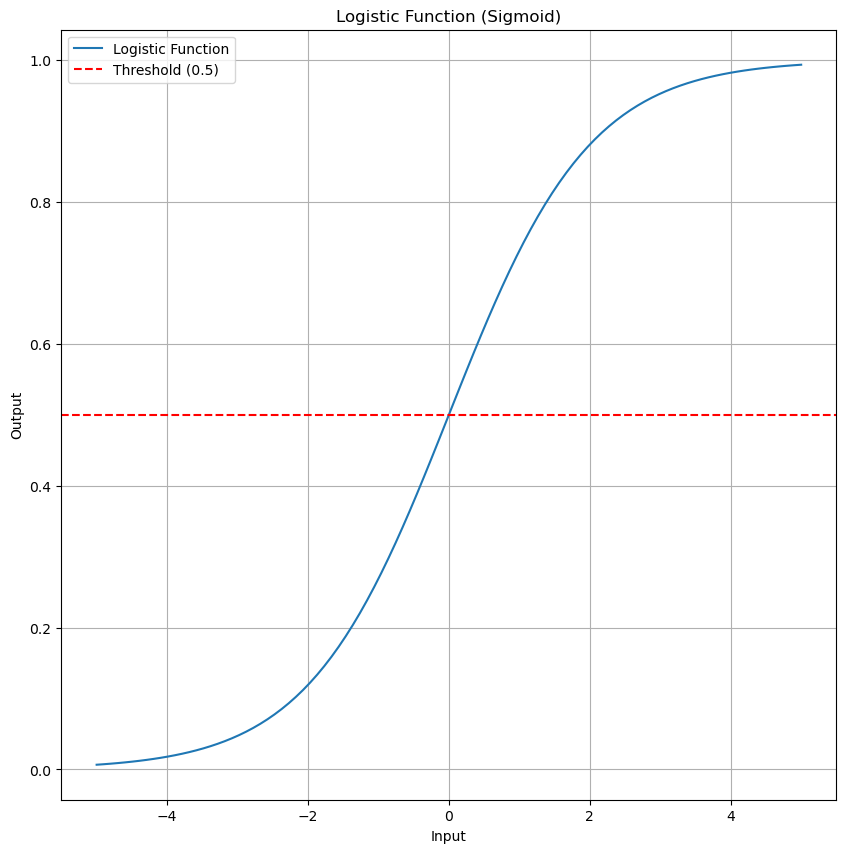

In [59]:
# Define the logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-5, 5, 100) # Generate a range of values for x

# Calculate corresponding y values by recalling the logistic function
y_values = logistic_function(x_values)

# Plot 
plt.figure(figsize=(10, 10))
plt.plot(x_values, y_values, label='Logistic Function')
plt.title('Logistic Function (Sigmoid)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.grid(True)
plt.show()

The plotted curve displays the characteristic S-shaped or sigmoidal pattern of the logistic function. This function smoothly transitions between 0 and 1 as the input variable (x) changes.

A red dashed line at y=0.5 represents the decision boundary or threshold of the logistic function. In binary classification problems, points on the curve where y>0.5 are often classified as one class, while points where y<0.5 are classified as the other class.

The x-axis denotes input values (x), and the y-axis represents the output values (y) of the logistic function. As x varies, the logistic function smoothly transitions from 0 to 1, highlighting its role in modeling probabilities. The sigmoid shape is crucial in logistic regression, transforming a linear combination of features into a probability score.

The visualisation effectively conveys the logistic function's behavior, emphasizing its S-shaped characteristic and its role in mapping input values to probabilities between 0 and 

#### 2.7.4 Logistic Regression - Analysis  

The code generates a scatter plot to visualise the standardised training data points, with colours representing their class labels ('Seed type'). A legend is incorporated to distinguish between classes. The resulting plot includes the decision boundary and the scatter plot of the training data. 

In essence, this code not only trains a binary logistic regression model but also provides a visual representation of the decision boundary on a scatter plot of the standardised training data. This visualisation aids in comprehending how the logistic regression model distinguishes between the two classes based on the standardised 'area' and 'perimeter' features.

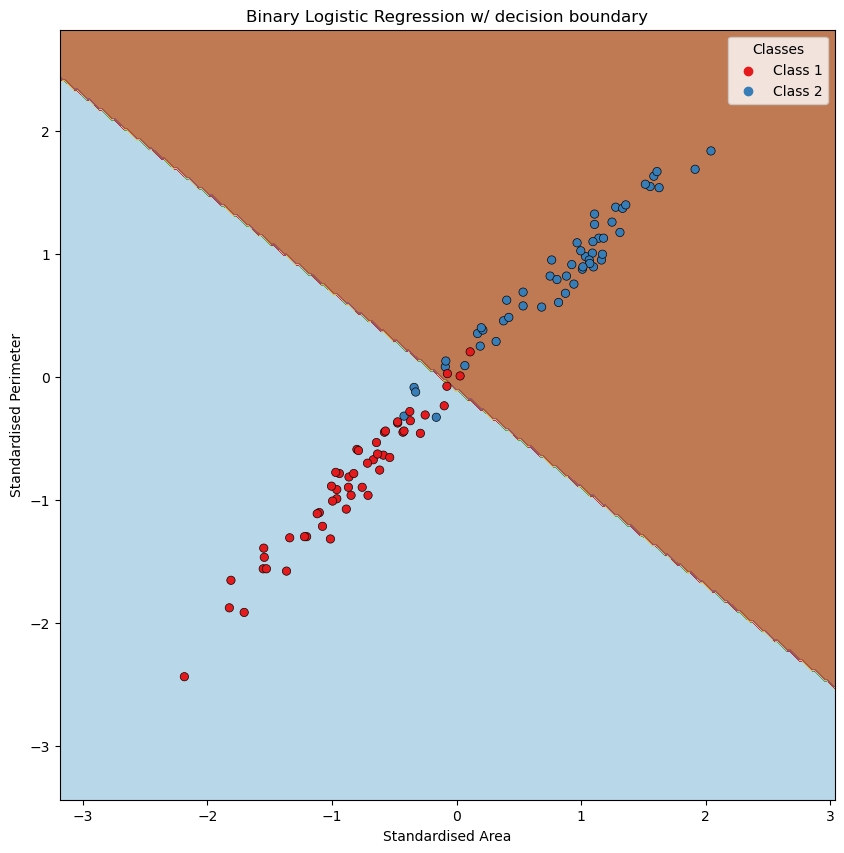

In [60]:
X = seedsdata2.iloc[:, [0, 1]]  # Select columns for 'area' and 'perimeter'
y = seedsdata2.iloc[:, -1]  # Select last column for 'Seed type'

# For binary logistic regression, we consider only two classes
X_binary = X[y.isin([1, 2])]  # Selecting classes 1 and 2 for binary classification
y_binary = y[y.isin([1, 2])]

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=100)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(random_state=100) 
clf.fit(X_train_scaled, y_train) 

h = .02  # step size 
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Scatter plot for training data
scatter = sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train, palette='Set1', edgecolor='k')
plt.xlabel('Standardised Area')
plt.ylabel('Standardised Perimeter')
plt.title('Binary Logistic Regression w/ decision boundary')
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=[f'Class {c}' for c in clf.classes_], title='Classes')
plt.show()

A decision boundary is overlaid on a contour plot, utilising a meshgrid to span the standardised 'area' and 'perimeter' range. This boundary effectively separates the two classes predicted by the logistic regression model.

The scatter plot visually represents the standardised training data points, with colours corresponding to their true class labels ('Seed type').

The decision boundary visually illustrates the model's learned classification boundaries within the feature space. Points on one side of the boundary are predicted as one class, while those on the other side are predicted as the second class. The scatter plot contributes to understanding how effectively the model distinguishes between the two classes based on the provided features.

The inclusion of a legend and plot customisation enhances the interpretability of the visual elements. This visual representation aids in comprehending the logistic regression model's ability to discriminate between the two seed classes, specifically based on standardized 'area' and 'perimeter'. 

In summary, the plot offers a visual insight into the logistic regression model's classification boundaries, providing valuable information about its performance in distinguishing between seed classes.

### 2.8 Discussion 

In our thorough exploration of the seeds data, the integration of unsupervised and supervised machine learning methods has provided a nuanced understanding of the dataset's underlying structures and its potential predictive capabilities.

The application of unsupervised methodologies, such as K-Means clustering and Gaussian Mixture Model (GMM), has revealed previously unknown and latent relationships inherent in the dataset. K-Means, functioning as a partitioning algorithm, offered a discerning overview of potential groupings based on feature similarities. Meanwhile, GMM, with its probabilistic nature, provided a more nuanced perspective that accommodates complex data distributions.

Visualisations of centroids and Gaussian contours have contributed intuitive insights into the intrinsic characteristics of each cluster, enriching our understanding of the data's inherent organization.

Transitioning to supervised learning with logistic regression, our focus shifted towards predictive and classification tasks, utilising labeled data to train a model for seed type classification. The probabilistic framework of logistic regression illuminated the likelihood of seeds belonging to specific classes.

Visualising decision boundaries shed light on the model's classification strategy, showcasing its proficiency in segregating data points based on learned patterns. Performance analysis of both unsupervised and supervised methods highlighted commendable outcomes, with each technique providing unique insights into the dataset.

Acknowledging room for improvement, we recognise that the models' efficacy could potentially be enhanced through meticulous refinement, such as hyperparameter tuning or the exploration of alternative algorithms. While our performance metrics, including accuracy, precision, recall, and F1-score, indicate notable accomplishments, they leave an open space for further optimization and fine-tuning.

The harmonious integration of unsupervised and supervised approaches stands as a promising avenue for continued exploration. The data-driven revelations from unsupervised clustering could inform feature engineering or guide the development of tailored predictive models. The careful selection of features derived from unsupervised exploration may serve as a crucial ingredient for refining subsequent supervised tasks, amplifying model interpretability and performance.

A continuous cycle of refinement, evaluation, and potentially the incorporation of ensemble methods may yield comprehensive insights, ultimately contributing to the optimisation of predictive capabilities. Nevertheless, in this holistic endeavor, the amalgamation of unsupervised and supervised techniques has laid a robust foundation for understanding and predicting patterns within the seeds data. 

While the performance analysis indicates noteworthy achievements, the recognition of potential enhancements underscores the iterative and dynamic nature of machine learning exploration, suggesting a pathway for ongoing refinement and deeper comprehension.

## References 

- [1] Momeni, A., Pincus, M., Libien, J., Momeni, A., Pincus, M. and Libien, J., 2018. Cross tabulation and categorical data analysis. Introduction to statistical methods in pathology, pp.93-120.
- [2] Bro, R. and Smilde, A.K., 2014. Principal component analysis. Analytical methods, 6(9), pp.2812-2831.